# Sugestões de Rotas ciclicas para Transporte de Ônibus Urbano

In [67]:
from _thread import *
from IPython.display import IFrame

import random
import threading
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Configuração para o algoritmo genético

In [68]:
totGeracoes  = 200
tamPopulacao = 35


indCruzamento = 10
CXPB = 0.5
MUTPB = 0.1
PROB_MUTACAO = 0.1
SEED_RANDOM = 64
#minimoAceitavel = 1
#pontuação baixo será eliminada do grafo
removerPior = 0

#fornecer ajuda para a evolucao do método
recebeAjuda  = False
ajudaQtd = 50

#Reforço no aprendizado
reforco = True

# Ajuste de 1.0 -> maximização ou -1.0 -> minimização da feature
feature1 = -1.0 #onemax
feature2 = 1.0 #dfs
feature3 = -1.0 #distancia dfs
feature4 = 1.0 #tam ciclo
feature5 = -1.0 #distancia ciclo

# Formato Imagens

In [69]:
'''
    Formatos Suportados salvar rotas e mapas: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz 
'''
formato_imgs = 'pdf'

# Configuração da Imagens

In [70]:
'''
    configuração da imagens
'''
edge_color = "#000000"         # cor da aresta
bgcolor    = "#D3D3D3"     # cor do background
node_color = "#9370DB"     # cor da vértice
node_size  = 30            # Tamanho do vértice
fig_height = 20           # altura figura
fig_width  = 20           # largura figura

# Localização para o OSMNX gerar o Grafo

In [71]:
try:
    place = 'Boa Vista, Roraima, BR'
    Raio_distancia = 15000

    G = ox.graph_from_address( place, network_type='drive', simplify=True, distance=Raio_distancia )
except:
    print("Falha na Conexão!!")

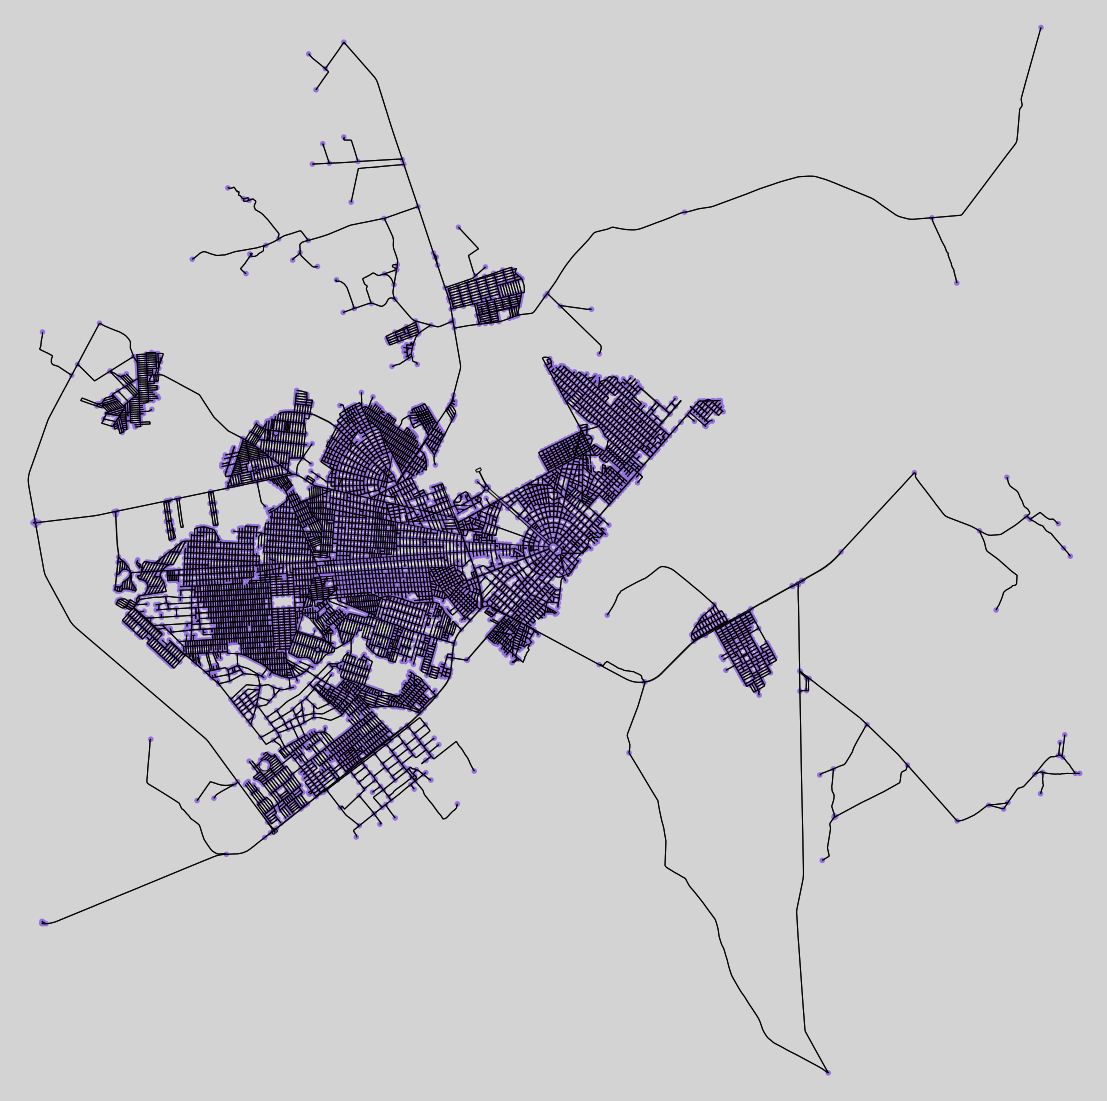

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f99b01f98>)

In [72]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaCompleto", save=True, file_format=formato_imgs)

# Vértice que representa o terminal de ônibus

In [73]:
nodosCentroCivico = ( 3648084763, 3648084762 )

# Extrai as informações das via do Grafo G

In [74]:
listaDados = []

dado = G.adj
for i in dado:
    for j in dado[i]:
        for k in dado[i][j]:
            print()
            print(dado[i][j][k])
            h = []
            h.append(i)
            h.append(j)
            h.append(dado[i][j][k])
            listaDados.append(h)


{'osmid': 348047232, 'oneway': True, 'name': 'Avenida A', 'highway': 'residential', 'length': 336.357}

{'osmid': 519374475, 'oneway': True, 'name': 'Avenida Pérola', 'highway': 'residential', 'length': 13.196}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 75.151}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 60.983999999999995, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f9ec780b8>}

{'osmid': 348047239, 'oneway': True, 'name': 'Avenida Uiramutã', 'highway': 'residential', 'length': 68.246}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 9.175}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid

{'osmid': 312792862, 'name': 'Rua das Raízes', 'highway': 'residential', 'oneway': False, 'length': 77.159}

{'osmid': 431798701, 'name': 'Rua Angelita Neiva de Góes', 'highway': 'residential', 'oneway': False, 'length': 64.291}

{'osmid': 431798701, 'name': 'Rua Angelita Neiva de Góes', 'highway': 'residential', 'oneway': False, 'length': 38.372}

{'osmid': 129300430, 'name': 'Rua Caubi Brasil de Magalhães', 'highway': 'residential', 'oneway': False, 'length': 65.566}

{'osmid': 129300430, 'name': 'Rua Caubi Brasil de Magalhães', 'highway': 'residential', 'oneway': False, 'length': 65.566}

{'osmid': 160117890, 'name': 'Rua Secundina Mingues Pereira de Moraes', 'highway': 'residential', 'oneway': False, 'length': 150.763}

{'osmid': 160117890, 'name': 'Rua Secundina Mingues Pereira de Moraes', 'highway': 'residential', 'oneway': False, 'length': 219.743, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d1c52b0>}

{'osmid': 160117889, 'name': 'Rua HC-03', 'highway':

{'osmid': 91888017, 'name': 'Rua do Canário', 'highway': 'residential', 'oneway': False, 'length': 71.448}

{'osmid': 158612103, 'oneway': True, 'name': 'Rua do Pavão', 'highway': 'residential', 'length': 139.084}

{'osmid': 551183124, 'oneway': True, 'lanes': '2', 'name': 'Avenida Princesa Isabel', 'highway': 'secondary', 'length': 62.065, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d1948d0>}

{'osmid': 696231631, 'oneway': False, 'name': 'Rua Abrilina Pena', 'highway': 'residential', 'length': 75.006, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d194908>}

{'osmid': 551183124, 'oneway': True, 'lanes': '2', 'name': 'Avenida Princesa Isabel', 'highway': 'secondary', 'length': 33.86}

{'osmid': 156568660, 'oneway': False, 'name': 'Rua Ana Cecilia Mota da Silva', 'highway': 'residential', 'length': 124.033, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d194940>}

{'osmid': 495229558, 'oneway': True, 'name': 'Avenida 


{'osmid': 383065258, 'name': 'Avenida Val de Cans', 'highway': 'residential', 'oneway': False, 'length': 37.274}

{'osmid': 158464740, 'oneway': False, 'name': 'Rua Alemanha', 'highway': 'residential', 'length': 165.244}

{'osmid': 158464740, 'oneway': False, 'name': 'Rua Alemanha', 'highway': 'residential', 'length': 158.544}

{'osmid': 719057702, 'oneway': False, 'name': 'Rua Paraguai', 'highway': 'residential', 'length': 60.436}

{'osmid': 719057707, 'oneway': False, 'name': 'Rua Paraguai', 'highway': 'residential', 'length': 59.475}

{'osmid': 158464742, 'oneway': True, 'name': 'Avenida Francisco Viana', 'highway': 'tertiary', 'length': 167.937}

{'osmid': 158465660, 'oneway': False, 'name': 'Rua Paraguai', 'highway': 'residential', 'length': 62.596}

{'osmid': 158465660, 'oneway': False, 'name': 'Rua Paraguai', 'highway': 'residential', 'length': 7.827}

{'osmid': 159918600, 'name': 'Rua Zuldimar Saraiva de Pinho', 'highway': 'residential', 'oneway': False, 'length': 16.928}

{'o

{'osmid': 156569523, 'name': 'Rua Raimundo Mendes de Souza Júnior', 'highway': 'tertiary', 'oneway': False, 'length': 102.708}

{'osmid': 156569523, 'name': 'Rua Raimundo Mendes de Souza Júnior', 'highway': 'tertiary', 'oneway': False, 'length': 104.31}

{'osmid': 717437800, 'name': 'Alameda das Hortências', 'highway': 'residential', 'oneway': False, 'length': 92.28}

{'osmid': 717437800, 'name': 'Alameda das Hortências', 'highway': 'residential', 'oneway': False, 'length': 54.476}

{'osmid': 717437801, 'name': 'Rua Botão de Ouro', 'highway': 'residential', 'oneway': False, 'length': 97.044}

{'osmid': 717437801, 'name': 'Rua Botão de Ouro', 'highway': 'residential', 'oneway': False, 'length': 144.385, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d09eeb8>}

{'osmid': 156569534, 'name': 'Rua Carlos Natrodt', 'highway': 'residential', 'oneway': False, 'length': 79.8}

{'osmid': 156569534, 'name': 'Rua Carlos Natrodt', 'highway': 'residential', 'oneway': False, 'le

{'osmid': 366880659, 'name': 'Rua Capitão Castro Mendes', 'highway': 'residential', 'oneway': False, 'length': 95.709}

{'osmid': 368178124, 'highway': 'tertiary', 'oneway': False, 'length': 12.98}

{'osmid': [368155400, 158935612], 'highway': 'tertiary', 'oneway': False, 'length': 214.35599999999997, 'name': 'Avenida Olavo Brasil', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d0494a8>}

{'osmid': 161262530, 'oneway': True, 'name': 'Rua Pau-Rainha', 'highway': 'tertiary', 'length': 10.471}

{'osmid': 368199086, 'oneway': True, 'name': 'Rua Augusto César Luitgards Moura', 'highway': 'secondary', 'length': 108.03}

{'osmid': 158912506, 'name': 'Rua Emanoela Jeiza', 'highway': 'residential', 'maxspeed': '40', 'oneway': False, 'length': 162.018}

{'osmid': 158912506, 'name': 'Rua Emanoela Jeiza', 'highway': 'residential', 'maxspeed': '40', 'oneway': False, 'length': 12.383}

{'osmid': 161262524, 'oneway': True, 'name': 'Avenida da Pitombeira', 'highway': 'secondary'


{'osmid': 368171143, 'oneway': True, 'name': 'Rua Dionísio Brito de Araújo', 'highway': 'tertiary', 'length': 10.722}

{'osmid': 156821774, 'oneway': True, 'name': 'Avenida João Liberato', 'highway': 'secondary', 'length': 84.088}

{'osmid': 159893708, 'oneway': False, 'name': 'Rua Soldado da Polícia Militar Jacinto José de Santana da Silva', 'highway': 'residential', 'length': 12.095}

{'osmid': 159912763, 'name': 'Avenida Soldado da Polícia Militar João Alves Brasil', 'highway': 'secondary', 'oneway': False, 'length': 99.679}

{'osmid': 183079426, 'oneway': True, 'name': 'Avenida Carlos Pereira de Melo', 'highway': 'primary', 'length': 115.084}

{'osmid': 389457337, 'oneway': False, 'name': 'Rua Moysés Teixeira Hausen', 'highway': 'residential', 'length': 147.659, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d020978>}

{'osmid': 156570901, 'oneway': False, 'name': 'Rua Joca Farias', 'highway': 'secondary', 'length': 99.788}

{'osmid': 156570901, 'oneway': Fal


{'osmid': 160002926, 'name': 'Rua Vicente Tavares de Melo', 'highway': 'residential', 'oneway': False, 'length': 166.421}

{'osmid': 160002926, 'name': 'Rua Vicente Tavares de Melo', 'highway': 'residential', 'oneway': False, 'length': 166.812}

{'osmid': 345337675, 'name': 'Rua Doutor Airton Rocha', 'highway': 'residential', 'oneway': False, 'length': 162.034}

{'osmid': 345337675, 'name': 'Rua Doutor Airton Rocha', 'highway': 'residential', 'oneway': False, 'length': 200.167}

{'osmid': 718752656, 'name': 'Travessa dos Macuxis', 'highway': 'residential', 'oneway': False, 'length': 86.004}

{'osmid': 718752656, 'name': 'Travessa dos Macuxis', 'highway': 'residential', 'oneway': False, 'length': 76.991}

{'osmid': 159995844, 'name': 'Rua Raimundo de Castro Barros', 'highway': 'residential', 'oneway': False, 'length': 160.519}

{'osmid': 159995844, 'name': 'Rua Raimundo de Castro Barros', 'highway': 'residential', 'oneway': False, 'length': 261.001}

{'osmid': 718752655, 'name': 'Trave

{'osmid': 345055866, 'oneway': True, 'lanes': '2', 'name': 'Avenida Glaycon de Paiva', 'highway': 'secondary', 'length': 229.47}

{'osmid': 154903721, 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'length': 10.351}

{'osmid': 154903746, 'oneway': True, 'name': 'Avenida Presidente Castelo Branco', 'highway': 'secondary', 'length': 161.205}

{'osmid': 154903721, 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'length': 14.483999999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf75630>}

{'osmid': 154903721, 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'length': 25.087000000000003, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf75668>}

{'osmid': 154913888, 'oneway': True, 'name': 'Avenida Presidente Castelo Branco', 'highway': 'secondary', 'length': 215.548, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf756a0>}

{'osmid': 335971383, 'name': 'Rua Profe

{'osmid': 160170525, 'name': 'Rua Rio Apiaú', 'highway': 'residential', 'oneway': False, 'length': 226.535}

{'osmid': 160269447, 'name': 'Rua Rio Maú', 'highway': 'residential', 'oneway': False, 'length': 78.711}

{'osmid': 160269447, 'name': 'Rua Rio Maú', 'highway': 'residential', 'oneway': False, 'length': 81.898}

{'osmid': 160269448, 'name': 'Rua Rio Quinó', 'highway': 'residential', 'oneway': False, 'length': 73.174}

{'osmid': 160269448, 'name': 'Rua Rio Quinó', 'highway': 'residential', 'oneway': False, 'length': 12.148}

{'osmid': 161262518, 'oneway': True, 'name': 'Avenida Rio Branco', 'highway': 'residential', 'length': 226.924}

{'osmid': 161262518, 'oneway': True, 'name': 'Avenida Rio Branco', 'highway': 'residential', 'length': 225.871}

{'osmid': 331762690, 'name': 'Rua Rio Uailan', 'highway': 'residential', 'oneway': False, 'length': 79.37}

{'osmid': 160269450, 'name': 'Rua Rio Cotingo', 'highway': 'residential', 'oneway': False, 'length': 223.008}

{'osmid': 16026945

{'osmid': 160276526, 'name': 'Rua Cometa', 'highway': 'residential', 'oneway': False, 'length': 65.25}

{'osmid': 91888122, 'name': 'Rua Tinoco Valente', 'highway': 'residential', 'oneway': False, 'length': 195.07}

{'osmid': 157934960, 'name': 'Rua General Penha Brasil', 'highway': 'tertiary', 'oneway': False, 'length': 153.642}

{'osmid': 569132715, 'name': 'Rua Doutor Arnaldo Brandão', 'highway': 'residential', 'oneway': False, 'length': 131.017}

{'osmid': 157934960, 'name': 'Rua General Penha Brasil', 'highway': 'tertiary', 'oneway': False, 'length': 139.96099999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f9d13dfd0>}

{'osmid': 569132715, 'name': 'Rua Doutor Arnaldo Brandão', 'highway': 'residential', 'oneway': False, 'length': 180.88299999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d20d048>}

{'osmid': 91888148, 'name': 'Rua Carlos Gomes', 'highway': 'residential', 'oneway': False, 'length': 7.016}

{'osmid': 7174357


{'osmid': 716997819, 'name': 'Avenida Pixinguinha', 'highway': 'residential', 'oneway': False, 'length': 93.208}

{'osmid': 716997819, 'name': 'Avenida Pixinguinha', 'highway': 'residential', 'oneway': False, 'length': 176.878}

{'osmid': 157924092, 'name': 'Avenida Jimi Hendrix', 'highway': 'residential', 'oneway': False, 'length': 162.185}

{'osmid': 157924092, 'name': 'Avenida Jimi Hendrix', 'highway': 'residential', 'oneway': False, 'length': 158.227}

{'osmid': 157924096, 'name': 'Avenida Carmem Miranda', 'highway': 'residential', 'oneway': False, 'length': 82.122}

{'osmid': 157924096, 'name': 'Avenida Carmem Miranda', 'highway': 'residential', 'oneway': False, 'length': 59.056}

{'osmid': 726035056, 'ref': 'RR-321', 'name': 'Bom Intento', 'highway': 'tertiary', 'oneway': False, 'length': 93.344}

{'osmid': [726035056, 161916889, 161916888], 'ref': 'RR-321', 'name': 'Bom Intento', 'highway': 'tertiary', 'oneway': False, 'length': 1038.0880000000002, 'bridge': 'yes', 'geometry': 

{'osmid': 129300415, 'oneway': False, 'name': 'Rua Doutor Luiz Brito Junior', 'highway': 'residential', 'length': 166.217}

{'osmid': 129300415, 'oneway': False, 'name': 'Rua Doutor Luiz Brito Junior', 'highway': 'residential', 'length': 166.507}

{'osmid': 532407013, 'name': 'Rua Adail Oliveira Rosa', 'highway': 'residential', 'oneway': False, 'length': 81.17}

{'osmid': 532407013, 'name': 'Rua Adail Oliveira Rosa', 'highway': 'residential', 'oneway': False, 'length': 84.432}

{'osmid': 129300206, 'name': 'Rua Professor Macêdo', 'highway': 'residential', 'oneway': False, 'length': 94.406}

{'osmid': 129300206, 'name': 'Rua Professor Macêdo', 'highway': 'residential', 'oneway': False, 'length': 98.212}

{'osmid': 129300227, 'name': 'Rua Mário do Violão', 'highway': 'residential', 'oneway': False, 'length': 204.336}

{'osmid': 129300227, 'name': 'Rua Mário do Violão', 'highway': 'residential', 'oneway': False, 'length': 199.686, 'geometry': <shapely.geometry.linestring.LineString object

{'osmid': 160367747, 'name': 'Rua Capella', 'highway': 'residential', 'oneway': False, 'length': 38.337}

{'osmid': 721773878, 'name': 'Rua Leão', 'highway': 'residential', 'oneway': False, 'length': 293.557}

{'osmid': 721773879, 'name': 'Rua Leão', 'highway': 'residential', 'oneway': False, 'length': 298.687}

{'osmid': 160367773, 'name': 'Rua Leão', 'highway': 'residential', 'oneway': False, 'length': 53.007}

{'osmid': 160367773, 'name': 'Rua Leão', 'highway': 'residential', 'oneway': False, 'length': 9.846}

{'osmid': 730900572, 'oneway': True, 'name': 'Avenida Gêmeos', 'highway': 'tertiary', 'length': 74.027}

{'osmid': 160355810, 'lanes': '2', 'name': 'Avenida das Galáxias', 'highway': 'tertiary', 'oneway': False, 'length': 89.652}

{'osmid': 160355810, 'lanes': '2', 'name': 'Avenida das Galáxias', 'highway': 'tertiary', 'oneway': False, 'length': 131.024}

{'osmid': 398003339, 'name': 'Rua Taurus', 'highway': 'residential', 'oneway': False, 'length': 79.535}

{'osmid': 16036776

{'osmid': 158461883, 'name': 'Rua Lourival Silva', 'highway': 'residential', 'oneway': False, 'length': 76.555}

{'osmid': 158461883, 'name': 'Rua Lourival Silva', 'highway': 'residential', 'oneway': False, 'length': 64.869}

{'osmid': 159841133, 'name': 'Rua Ademário Santos', 'highway': 'residential', 'oneway': False, 'length': 168.041}

{'osmid': 159841133, 'name': 'Rua Ademário Santos', 'highway': 'residential', 'oneway': False, 'length': 171.634}

{'osmid': 159841141, 'name': 'Rua Tia Joaca', 'highway': 'residential', 'oneway': False, 'length': 127.422}

{'osmid': 655067900, 'oneway': True, 'name': 'Avenida General Ataíde Teive', 'highway': 'secondary', 'maxspeed': '50', 'length': 66.565}

{'osmid': 159238492, 'oneway': True, 'name': 'Avenida Nossa Senhora de Nazaré', 'highway': 'secondary', 'length': 166.638}

{'osmid': 159841158, 'name': 'Rua Alcides Lima', 'highway': 'residential', 'oneway': False, 'length': 94.031}

{'osmid': 159841158, 'name': 'Rua Alcides Lima', 'highway': 'r


{'osmid': 717050045, 'name': 'Rua Canário', 'highway': 'residential', 'oneway': False, 'length': 132.086}

{'osmid': 157869171, 'oneway': True, 'name': 'Avenida Sebastião Diniz', 'highway': 'tertiary', 'length': 12.084}

{'osmid': 161262517, 'oneway': True, 'name': 'Avenida Major Williams', 'highway': 'secondary', 'length': 66.507}

{'osmid': 154913815, 'name': 'Rua Uirapuru', 'highway': 'residential', 'oneway': False, 'length': 14.289}

{'osmid': 154913815, 'name': 'Rua Uirapuru', 'highway': 'residential', 'oneway': False, 'length': 119.02}

{'osmid': 179211780, 'oneway': True, 'name': 'Rua Patativa', 'highway': 'residential', 'length': 70.806}

{'osmid': 160348245, 'name': 'Rua José Renato Hadad', 'highway': 'residential', 'oneway': False, 'length': 221.702}

{'osmid': 160348245, 'name': 'Rua José Renato Hadad', 'highway': 'residential', 'oneway': False, 'length': 268.679, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d0498d0>}

{'osmid': 160348265, 'name': 'R


{'osmid': 722075223, 'name': 'Alameda das Orquídeas', 'highway': 'residential', 'oneway': False, 'length': 41.932}

{'osmid': 156569694, 'name': 'Rua dos Tajás', 'highway': 'residential', 'oneway': False, 'length': 101.429, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d0206d8>}

{'osmid': 158465663, 'name': 'Rua David Ramalho', 'highway': 'residential', 'oneway': False, 'length': 110.566}

{'osmid': 551183124, 'oneway': True, 'lanes': '2', 'name': 'Avenida Princesa Isabel', 'highway': 'secondary', 'length': 97.975}

{'osmid': 51332296, 'oneway': False, 'name': 'Rua Antônio da Costa Uchôa', 'highway': 'residential', 'length': 256.383, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d020710>}

{'osmid': 129300210, 'name': 'Rua Almerindo dos Santos', 'highway': 'residential', 'oneway': False, 'length': 130.927}

{'osmid': 655065871, 'oneway': True, 'lanes': '2', 'name': 'Avenida Princesa Isabel', 'highway': 'secondary', 'length': 37.372}

{'os

{'osmid': 517351771, 'name': 'Avenida José Alves Cavalcanti', 'highway': 'residential', 'oneway': False, 'length': 35.954}

{'osmid': 669944794, 'name': 'Rua Eneida Jucene dos Santos Cavalcanti', 'highway': 'residential', 'oneway': False, 'length': 68.557}

{'osmid': [669944794, 517350444], 'name': 'Rua Eneida Jucene dos Santos Cavalcanti', 'highway': 'residential', 'oneway': False, 'length': 333.119, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf915f8>}

{'osmid': 517351767, 'name': 'Rua Marta Jucene dos Santos', 'highway': 'residential', 'oneway': False, 'length': 277.8}

{'osmid': 669944794, 'name': 'Rua Eneida Jucene dos Santos Cavalcanti', 'highway': 'residential', 'oneway': False, 'length': 68.557}

{'osmid': 669944795, 'highway': 'residential', 'oneway': False, 'length': 33.617}

{'osmid': 669615836, 'highway': 'residential', 'oneway': False, 'length': 86.59200000000001, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf916d8>}

{'os

{'osmid': 154913810, 'name': 'Rua José Raimundo da Silva', 'highway': 'residential', 'oneway': False, 'length': 112.922, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf570f0>}

{'osmid': 154913941, 'name': 'Rua Miguel Lupe Martins', 'highway': 'residential', 'oneway': False, 'length': 109.54, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf57128>}

{'osmid': 154913941, 'name': 'Rua Miguel Lupe Martins', 'highway': 'residential', 'oneway': False, 'length': 265.113, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf57160>}

{'osmid': 91888055, 'name': 'Rua Coronel Mota', 'highway': 'tertiary', 'oneway': False, 'length': 8.386}

{'osmid': 91888055, 'name': 'Rua Coronel Mota', 'highway': 'tertiary', 'oneway': False, 'length': 134.409}

{'osmid': 704153899, 'oneway': True, 'name': 'Avenida Nossa Senhora da Consolata', 'highway': 'secondary', 'length': 166.884, 'geometry': <shapely.geometry.linestring.LineString object at 0x

{'osmid': 476321938, 'highway': 'residential', 'oneway': False, 'length': 18.547}

{'osmid': 511186652, 'highway': 'residential', 'oneway': False, 'length': 291.529, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf3a2e8>}

{'osmid': 476321938, 'highway': 'residential', 'oneway': False, 'length': 43.013}

{'osmid': 476321938, 'highway': 'residential', 'oneway': False, 'length': 18.26}

{'osmid': 511186655, 'highway': 'residential', 'oneway': False, 'length': 297.521}

{'osmid': 511186655, 'highway': 'residential', 'oneway': False, 'length': 297.521}

{'osmid': 511186655, 'highway': 'residential', 'oneway': False, 'length': 56.58500000000001, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf3a3c8>}

{'osmid': [511186657, 730940110], 'highway': 'residential', 'oneway': False, 'length': 355.279, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8cf3a400>}

{'osmid': 476321938, 'highway': 'residential', 'oneway': False, 'length'

# Gera uma lista com as pontuações que cada aresta recebeu dentre as suas características

In [75]:
listaValores = []
valorRuim = -1

for i in listaDados:
    soma = 0
    #print(i[2]['osmid'])    
    
    #---------------------------------------------------------------------------------------------------------            
    '''
    if 'maxspeed' in i[2] and isinstance( i[2]['maxspeed'], int ):
        if int(i[2]['maxspeed']) < 40 and int(i[2]['maxspeed']) > 60 or 'maxspeed' not in i[2]:
            soma = valorRuim
        else:
            soma += 5
    else:
        if 'maxspeed' in i[2]:
            p = 0
            j = 0
            for k in i[2]['maxspeed']:
                p += int(k)
                j+=1
            soma += (p/j)
        else:
            soma = valorRuim
    '''
    
    #---------------------------------------------------------------------------------------------------------
    if "highway" in i[2]:
        if i[2]['highway'] == "residential": #ex Rua Chicó Lira
            soma = valorRuim
        elif i[2]['highway'] == "primary": #ex: avenida venezuela
            soma = 1
        elif i[2]['highway'] == "secondary": #ex: Major Williams
            soma = 1
        elif i[2]['highway'] == "tertiary": #ex: Rua General Penha Brasil
            soma = 1
        else:
            soma = valorRuim
    
    
    #---------------------------------------------------------------------------------------------------------    
    #total de faixas da via
    '''
    if ("lanes" in i[2]) and ("oneway" in i[2]):
        liness = i[2]['lanes']
        if isinstance(liness , list):
            for d in liness:
                soma += int(d)
        else:
            soma = (int(liness) * 5) + 5 + soma
    else:
        
        if "lanes" in i[2]:
            soma +=  int(i[2]['lanes']) * 5
            
        #o resultado da maioria
        if "oneway" in i[2]:
            if i[2]['oneway'] == True:
                soma += 5                
            else:
                soma = valorRuim
    '''
    
    listaValores.append(soma)


# Separa os vértices que não conseguiram atingir a pontuação mínima para remoção do Grafo

In [76]:
remover = []

for i in range(len(listaValores)):
    #if listaValores[i] <= 0:
    if listaValores[i] <= removerPior:
        remover.append( (listaDados[i][0], listaDados[i][1]))
        
#remove as arestas que foram selecionadas como ruins 
G.remove_edges_from(remover)

# Atualiza a lista de arestas que estão aptas a serem selecionadas

In [77]:
listaValoresNew = []
listaDadosNew = []

for i in range(len(listaDados)):
    if listaValores[i] >= removerPior:
        listaValoresNew.append( listaValores[i] )
        listaDadosNew.append( listaDados[i] )

#remover os dados antigos para devolver memória
listaDados.clear()
listaValores.clear()
print(len(listaValoresNew))

7044


In [78]:
'''
    Acesso aos dados!

print(listaDadosNew[0])
print()
print(listaDadosNew[0][0])
print()
print(listaDadosNew[0][1])
print()
print(listaDadosNew[0][2])
print()
print(listaDadosNew[0][2]['name'])
'''

"\n    Acesso aos dados!\n\nprint(listaDadosNew[0])\nprint()\nprint(listaDadosNew[0][0])\nprint()\nprint(listaDadosNew[0][1])\nprint()\nprint(listaDadosNew[0][2])\nprint()\nprint(listaDadosNew[0][2]['name'])\n"

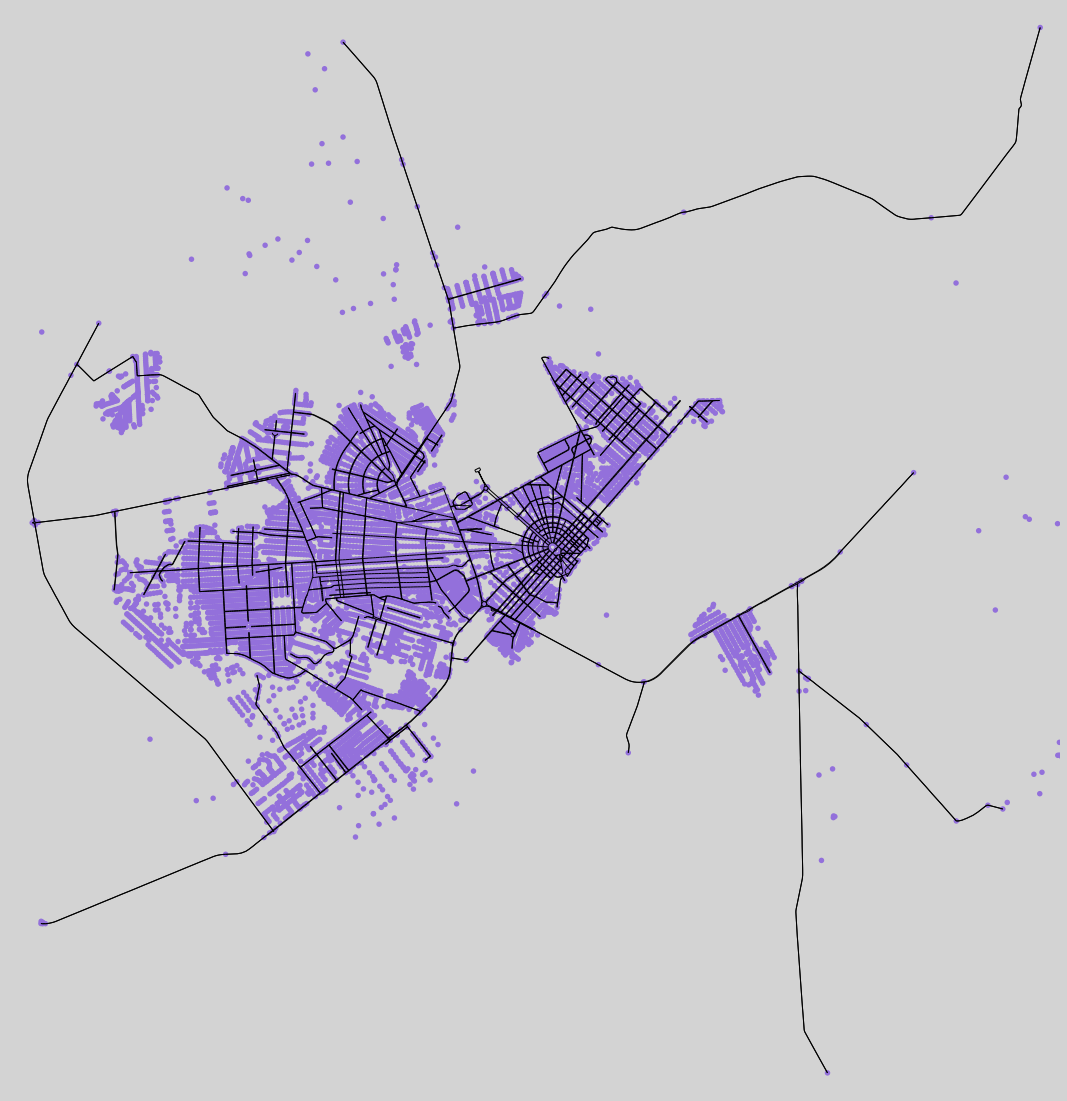

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f990ab828>)

In [79]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaFiltrado", save=True,  file_format=formato_imgs)

# Lista que receberá os caminhos encontrados pelo AG

In [80]:
listaResultadoDFS = []
tamanhoDosCiclosSalvos = []

tamGenes = len( listaDadosNew )

# Lista para salvar as informações da evolução do AG para plotagem de gráfico ao final do experimento

In [81]:
PlotMinDadosONEMAX  = []
PlotMeanDadosONEMAX = []
PlotMaxDadosONEMAX  = []

PlotMinDadosDFS  = []
PlotMeanDadosDFS = []
PlotMaxDadosDFS  = []

PlotMinDistDFS = []
PlotMeanDistDFS = []
PlotMaxDistDFS = []

PlotMinTamCiclo = []
PlotMeanTamCiclo = []
PlotMaxTamCiclo = []

PlotMinDistCiclo = []
PlotMeanDistCiclo = []
PlotMaxDistCiclo = []

# Controle dos ciclos

In [82]:
PlotMaioresCiclos = []
PlotMaioresCiclos.append(0)

In [83]:
lenghtListaDadosnew = len(listaDadosNew)

# Reforço

In [84]:
reforco = [ 0 for _ in range(0, len(G.nodes)+1)]

# Busca em profundidade que encontrará os caminhos caso exista

In [85]:
def DFS_BuscaCiclo(grafo, mapa, mapaGrafo, verticeInicial, tamGrafo):
    
    import stack    
    pilha = stack.stack()
    v = verticeInicial
    
    #vetor de marcação de visitados e de elementos que estão na pilha O(1)
    visitados = []
    pilha_rec = []
    
    for i in range(tamGrafo):
        visitados.append(False)
        pilha_rec.append(False)
    
        
    it = -1
    contListaPercorrida = 0
    contDistPercorrida  = 0
    semDistancia = 0
    listaPercorrida = []
    controleMaiorCiclo = PlotMaioresCiclos[-1]
    
    tamanhoCicloRetorno = 0
    distanciaCicloRetorno = 0
    
    #inicio da BFS
    while True:
        achou_vizinho = False        
        
        listaPercorrida.append(v)
        contListaPercorrida += 1
                
        if not visitados[ mapa[ v ] ]:
            x = mapa[ v ]
            
            pilha.empilhar( x )
            visitados[ x ] = True
            pilha_rec[ x ] = True
            
            
        for it in grafo[v]:
            
            #se tiver na pilha é porque possue ciclo - Achou um Ciclo          
            if pilha_rec[ mapa[ it ] ] and it == verticeInicial:
                
                listaArestasCiclo = []
                
                for k in listaPercorrida:
                    if pilha_rec[ mapa[ k ] ] == True:
                        listaArestasCiclo.append( k )
                        
                tamList = len( listaArestasCiclo )
                
                tamanhoCicloRetorno = tamList
                distanciaCicloRetorno = contDistPercorrida
                
                '''
                    sempre salva ciclos maiores!
                '''
                if tamList > controleMaiorCiclo:
                    controleMaiorCiclo = tamList
                    
                    PlotMaioresCiclos.append( controleMaiorCiclo )
                                                        
                    '''
                        Pega o ciclo para salvar
                    '''
                    
                    cicloAtual = []
                    
                    #for k in range(1, len(listaArestasCiclo)):
                    for k in range(1, tamList):
                        cicloAtual.append( (listaArestasCiclo[k-1], listaArestasCiclo[k]) )
                    cicloAtual.append( ( listaArestasCiclo[-1], listaArestasCiclo[0] ) )
                    
                    cicloAtualList = list( cicloAtual )
                    listaResultadoDFS.append( cicloAtualList )
                    tamanhoDosCiclosSalvos.append( tamList )
                    
                else:
                    achou_vizinho = False
                    break
                
                    
            if not visitados[ mapa[ it ] ]:
                achou_vizinho = True
                break
                
        if not achou_vizinho:
            pilha_rec[ pilha.topo() ] = False
                
            pilha.desempilhar()
            
            if pilha.p_vazia():
                break
                
            v = mapaGrafo[ pilha.topo() ]
        
        else:
            # -------- pegar a distancia de A -> B ---------
            # do vertice A
            verticeAtual = v
            # para o vertice B
            verticeNovo  = it
            
            '''
            print(listaDadosNew[0])
            print()
            print(listaDadosNew[0][0])
            print()
            print(listaDadosNew[0][1])
            print()
            print(listaDadosNew[0][2])
            print()
            print(listaDadosNew[0][2]['name'])

            [321519672, 3589971255, {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}]

            321519672

            3589971255

            {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary',
            'length': 18.205}

            Rua Coronel Pinto

            '''
            try:

                '''
                    Pegar a distancia percorrida pela DFS..
                '''
                            
                for lista_i in range(lenghtListaDadosnew):            
                    if( listaDadosNew[lista_i][0] == verticeAtual and listaDadosNew[lista_i][1] == verticeNovo ):

                        if 'length' in listaDadosNew[lista_i][2]:
                            lenghtAresta = float(listaDadosNew[lista_i][2]['length'])
                            contDistPercorrida  = float(contDistPercorrida + lenghtAresta)
                        else:
                            semDistancia = semDistancia + 1
            except:
                print("Erro na distancia...")
            
            
            
            # ---------------------------------------------
            
            # da busca em profundidade troca o vertice para o proximo
            # ---- NAO mexer ----------
            v =  it
            # -------------------------
    
    '''
        calcular a distancia achada + a media das distancias nao achadas
    '''
    
    
    # distancia percorrida
    distanciaFinal = ( contDistPercorrida ) + ( 15 * semDistancia )
    #print("Distancia percorrida: {}".format(distanciaFinal))   
    
    '''
        Falta retornar a distancia percorrida junto com a contListaPercorrida
    '''
    
    # Retorna a quantidade de arestas visitadas na busca em profundidade
    return contListaPercorrida, distanciaFinal, tamanhoCicloRetorno, distanciaCicloRetorno 

# Função que executa um filtro para remover as arestas não selecionadas pelo AG e envia a DFS para validação de rotas

In [86]:
def temCicloDFS(individuo):
    
    # cópia do grafo
    G_aux = G.copy()
    
    tamNodes = len(G_aux.nodes)
    
    # ajuda na evolução do onemax
    if recebeAjuda == True:        
        for i in range(ajudaQtd):            
            #posicao = random.randint(0,tam-1)
            #individuo[posicao] = 1
            individuo[random.randint(0, tamGenes-1)] = 1
    
    
    ## Aprendizagem por reforço
    if reforco == True:
        for i in range(0, tamInd):
            if individuo[i] == 0 and reforco[i] > 0:
                individuo[i] = 1
        
                
    #identificador da posicao do nodo centro cívico para verificar se esta ativo
    for i in range(tamGenes):
        if listaDadosNew[i][0] == nodosCentroCivico[0] and listaDadosNew[i][1] == nodosCentroCivico[1]:
            individuo[i] = 1            
            break;
            
    
    #lista para remover os nós não selecionados pelo AG
    listaRemover = []            
        
    #Seleção dos nodos não selecionados
    #for i in range(len(individuo)):
    for i in range(tamGenes):
        if individuo[i] == 0:
            listaRemover.append( (listaDadosNew[i][0], listaDadosNew[i][1]) )            
        
        
    #Remove os nodos não selecionados pelo AG
    G_aux.remove_edges_from( listaRemover )
    
    
    
    #listaMapa recebe os valores de [0 a totNodos]
    listaMapa = []
    #for i in range(len(G_aux.nodes)):
    for i in range(tamNodes):
        listaMapa.append(i)
    
    
    # 215151515 --> 10
    mapa = pd.Series(index=G_aux.nodes, data=listaMapa)
    # 10 --> 215151515
    mapaGrafo = pd.Series(G_aux.nodes)
    
    
    '''
        DFS --- Busca um ciclo a partir do terminal de ônibus do centro Cívico 
    
    '''
       
    return DFS_BuscaCiclo(G_aux, mapa, mapaGrafo, nodosCentroCivico[0], len(G_aux.nodes))

# DEAP - ONEMAX

In [87]:
from deap import base
from deap import creator
from deap import tools
from deap import creator, base, tools, algorithms
import random


In [88]:
'''
    1) OneMax
    2) DFS
    3) Distancia percorrida DFS
    4) tamanho do ciclo
    5) distancia do trajeto da rota
'''
creator.create("FitnessMulti", base.Fitness, weights=(feature1, feature2, feature3, feature4, feature5))
creator.create("Individual", list, fitness=creator.FitnessMulti)

def evalFitness(individual):
    '''
        Retorno do método
        contListaPercorrida, distanciaFinal, tamanhoCicloRetorno, distanciaCicloRetorno
    '''
    tamDFS, distanciaDFS, tamanhoCiclo, distanciaCiclo = temCicloDFS(individual)
    return np.sum(individual), tamDFS, distanciaDFS, tamanhoCiclo, distanciaCiclo
    


toolbox = base.Toolbox()
toolbox.register("bit", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.bit, tamGenes)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, n=tamPopulacao)
toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxUniform, indpb=0.1)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selNSGA2)



def main():
    
    #random.seed(SEED_RANDOM)   
    population = toolbox.population()
    fits = toolbox.map(toolbox.evaluate, population)
    
    for fit, ind in zip(fits, population):
        ind.fitness.values = fit
    
    print("Start of evolution")
            
    for gen in range(totGeracoes):
                
        print('\nGERAÇÃO: {}'.format(gen+1))
        offspring = algorithms.varOr(population, toolbox, lambda_=tamPopulacao, cxpb=0.5, mutpb=0.1)
        fits = toolbox.map(toolbox.evaluate, offspring)
        
        l_onemax = []
        l_dfs = []
        l_dist = []
        l_tam_ciclo = []
        l_dist_ciclo = []
        
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit            
            x, y, z, w, v = fit
            l_onemax.append(x)
            l_dfs.append(y)
            l_dist.append(z)
            l_tam_ciclo.append(w)
            l_dist_ciclo.append(v)
            #print("{} {} {} {} {}".format(x, y, z, w, v))
            
        population = toolbox.select(offspring + population, k=tamPopulacao)
        
        # ONEMAX
        minimo = int(np.min(l_onemax))
        maximo = int(np.max(l_onemax))
        media  = int(np.mean(l_onemax))
        dif = maximo - minimo        
        print("ONEMAX:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDadosONEMAX.append(minimo)
        PlotMeanDadosONEMAX.append(media)
        PlotMaxDadosONEMAX.append(maximo)
        
        # DFS
        minimo = int(np.min(l_dfs))
        maximo = int(np.max(l_dfs))
        media  = int(np.mean(l_dfs))
        dif = maximo - minimo        
        print("DFS:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDadosDFS.append(minimo)
        PlotMeanDadosDFS.append(media)
        PlotMaxDadosDFS.append(maximo)
        
        # DISTÂNCIA
        minimo = int(np.min(l_dist))
        maximo = int(np.max(l_dist))
        media  = int(np.mean(l_dist))
        dif = maximo - minimo        
        print("DIST:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDistDFS.append(minimo)
        PlotMeanDistDFS.append(media)
        PlotMaxDistDFS.append(maximo)
        
        # Tamanho Ciclo
        minimo = int(np.min(l_tam_ciclo))
        maximo = int(np.max(l_tam_ciclo))
        media  = int(np.mean(l_tam_ciclo))
        dif = maximo - minimo        
        print("TamC:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinTamCiclo.append(minimo)
        PlotMeanTamCiclo.append(media)
        PlotMaxTamCiclo.append(maximo)
        
        # tamanho da rota Ciclica
        minimo = int(np.min(l_dist_ciclo))
        maximo = int(np.max(l_dist_ciclo))
        media  = int(np.mean(l_dist_ciclo))
        dif = maximo - minimo        
        print("DistRotaC:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDistCiclo.append(minimo)
        PlotMeanDistCiclo.append(media)
        PlotMaxDistCiclo.append(maximo)
        
        
    print("-- End of (successful) evolution --")
        
if __name__ == "__main__":
    main()

Start of evolution

GERAÇÃO: 1
ONEMAX:	3409	3516	3593	184
DFS:	3	15	113	110
DIST:	69	757	6008	5939
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 2
ONEMAX:	3397	3502	3596	199
DFS:	3	23	133	130
DIST:	69	1177	7440	7371
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 3
ONEMAX:	3397	3495	3577	180
DFS:	3	31	103	100
DIST:	69	1569	4818	4749
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 4
ONEMAX:	3397	3490	3577	180
DFS:	3	34	103	100
DIST:	69	1667	4818	4749
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 5
ONEMAX:	3397	3495	3581	184
DFS:	5	41	125	120
DIST:	119	2081	5981	5862
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 6
ONEMAX:	3398	3488	3589	191
DFS:	3	43	159	156
DIST:	69	2141	8454	8385
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 7
ONEMAX:	3390	3499	3581	191
DFS:	3	57	159	156
DIST:	69	2934	8454	8385
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 8
ONEMAX:	3390	3509	3588	198
DFS:	5	69	159	154
DIST:	119	3647	8454	8335
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 9
ONEMAX:	3400	3508	3583	183
DFS:	3	64	161	158
DIST:	69	33

ONEMAX:	3466	3479	3489	23
DFS:	275	457	463	188
DIST:	13568	23107	23394	9826
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 66
ONEMAX:	3470	3479	3492	22
DFS:	343	455	463	120
DIST:	18595	23103	23394	4799
TamC:	0	0	26	26
DistRotaC:	0	419	14681	14681

GERAÇÃO: 67
ONEMAX:	3461	3479	3497	36
DFS:	7	419	463	456
DIST:	151	21276	23394	23243
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 68
ONEMAX:	3467	3479	3490	23
DFS:	173	453	463	290
DIST:	9353	22939	23394	14041
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 69
ONEMAX:	3480	3480	3493	13
DFS:	173	441	463	290
DIST:	8553	22350	23394	14841
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 70
ONEMAX:	3455	3479	3483	28
DFS:	101	437	463	362
DIST:	5031	22096	23394	18363
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 71
ONEMAX:	3456	3479	3493	37
DFS:	323	454	463	140
DIST:	17029	23003	23394	6365
TamC:	0	0	0	0
DistRotaC:	0	0	0	0

GERAÇÃO: 72
ONEMAX:	3479	3481	3505	26
DFS:	5	442	463	458
DIST:	119	22336	23394	23275
TamC:	0	0	26	26
DistRotaC:	0	228	7999	7999

GERAÇÃO: 73
ONEMAX:	

ONEMAX:	3420	3471	3555	135
DFS:	47	331	493	446
DIST:	2139	16786	26060	23921
TamC:	0	13	35	35
DistRotaC:	0	10206	23656	23656

GERAÇÃO: 130
ONEMAX:	3430	3477	3561	131
DFS:	7	304	499	492
DIST:	151	15591	26060	25909
TamC:	0	15	53	53
DistRotaC:	0	6312	17140	17140

GERAÇÃO: 131
ONEMAX:	3404	3488	3568	164
DFS:	7	248	489	482
DIST:	151	12912	26083	25932
TamC:	0	7	53	53
DistRotaC:	0	3294	16455	16455

GERAÇÃO: 132
ONEMAX:	3408	3476	3560	152
DFS:	13	352	499	486
DIST:	564	17873	26060	25496
TamC:	0	16	53	53
DistRotaC:	0	7199	23644	23644

GERAÇÃO: 133
ONEMAX:	3417	3455	3516	99
DFS:	3	331	503	500
DIST:	69	17460	26243	26174
TamC:	0	8	29	29
DistRotaC:	0	4259	10031	10031

GERAÇÃO: 134
ONEMAX:	3414	3462	3516	102
DFS:	13	302	513	500
DIST:	564	15371	27011	26447
TamC:	0	15	53	53
DistRotaC:	0	7407	23644	23644

GERAÇÃO: 135
ONEMAX:	3427	3472	3516	89
DFS:	3	287	499	496
DIST:	69	14393	24442	24373
TamC:	0	18	53	53
DistRotaC:	0	8598	23644	23644

GERAÇÃO: 136
ONEMAX:	3426	3476	3522	96
DFS:	3	286	499	496
DIST:	69	14

ONEMAX:	3432	3549	3662	230
DFS:	3	284	609	606
DIST:	69	14401	30649	30580
TamC:	0	21	59	59
DistRotaC:	0	8030	29759	29759

GERAÇÃO: 191
ONEMAX:	3419	3541	3668	249
DFS:	3	347	665	662
DIST:	69	17688	33865	33796
TamC:	0	18	59	59
DistRotaC:	0	10868	33501	33501

GERAÇÃO: 192
ONEMAX:	3448	3520	3625	177
DFS:	3	479	665	662
DIST:	69	24323	34013	33944
TamC:	0	14	46	46
DistRotaC:	0	12365	33649	33649

GERAÇÃO: 193
ONEMAX:	3446	3556	3668	222
DFS:	57	394	665	608
DIST:	2998	19975	34013	31015
TamC:	0	17	59	59
DistRotaC:	0	14275	33649	33649

GERAÇÃO: 194
ONEMAX:	3446	3543	3668	222
DFS:	3	308	547	544
DIST:	69	15707	26886	26817
TamC:	0	15	52	52
DistRotaC:	0	7572	26672	26672

GERAÇÃO: 195
ONEMAX:	3426	3539	3654	228
DFS:	5	277	665	660
DIST:	119	14250	33865	33746
TamC:	0	20	59	59
DistRotaC:	0	7332	33501	33501

GERAÇÃO: 196
ONEMAX:	3465	3545	3647	182
DFS:	3	296	665	662
DIST:	69	14959	33865	33796
TamC:	0	19	59	59
DistRotaC:	0	7149	33501	33501

GERAÇÃO: 197
ONEMAX:	3426	3533	3638	212
DFS:	25	378	665	640
DIST:	10

# Gráfico da Evolução do AG dentre as gerações com máximo, média e mínimo

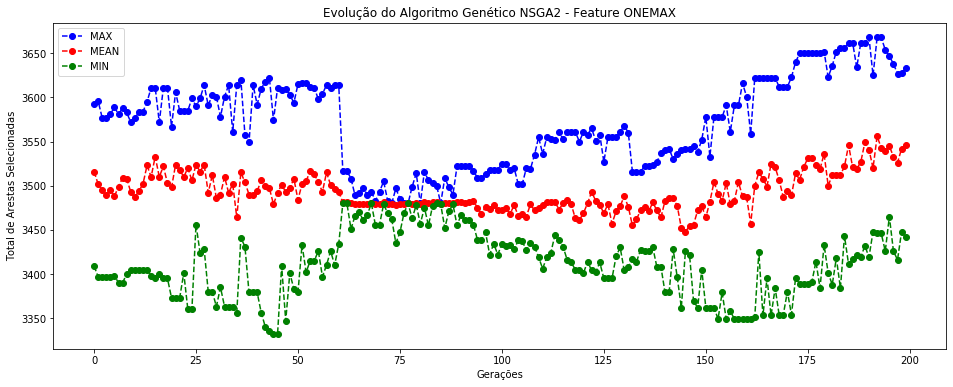

In [89]:
# fazer um tratamento se o maxdados for o valor de sinalização para remove-lo da lista para nao estragar o gráfico
plt.figure(figsize=(16,6))
plt.plot(PlotMaxDadosONEMAX, 'ob--' , label='MAX')
plt.plot(PlotMeanDadosONEMAX, 'or--' ,label='MEAN')
plt.plot(PlotMinDadosONEMAX, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Total de Arestas Selecionadas')
plt.title('Evolução do Algoritmo Genético NSGA2 - Feature ONEMAX')
plt.legend(loc='upper left')
plt.savefig("images/GraficoONEMAX.pdf",format="pdf")
#plt.show()


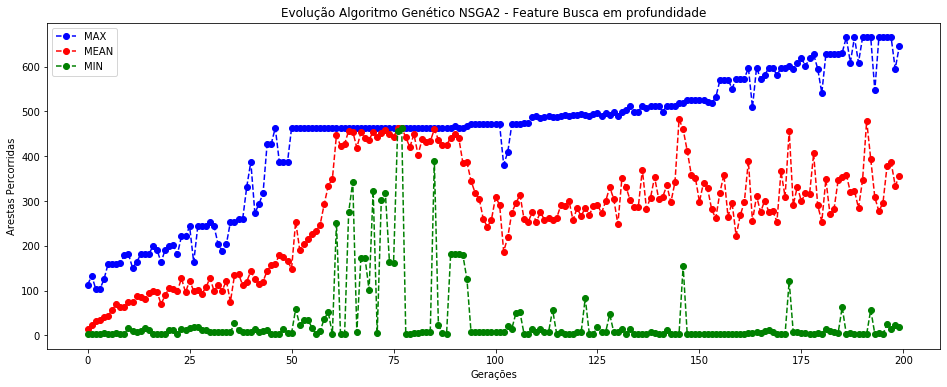

In [90]:
#
# fazer um tratamento se o maxdados for o valor de sinalização para remove-lo da lista para nao estragar o gráfico
plt.figure(figsize=(16,6))
plt.plot(PlotMaxDadosDFS, 'ob--' , label='MAX')
plt.plot(PlotMeanDadosDFS, 'or--' ,label='MEAN')
plt.plot(PlotMinDadosDFS, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Arestas Percorridas')
plt.title('Evolução Algoritmo Genético NSGA2 - Feature Busca em profundidade')
plt.legend(loc='upper left')
plt.savefig("images/GraficoDFS.pdf",format="pdf")
#plt.show()


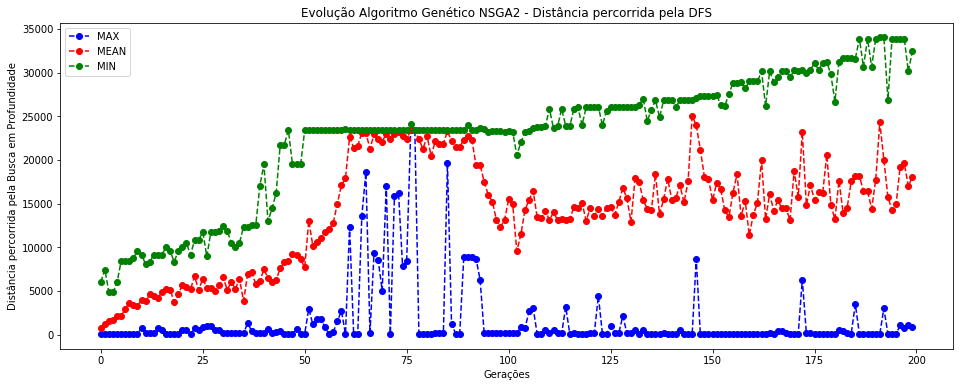

In [91]:
#
# Distancia percorrida DFS
plt.figure(figsize=(16,6))
plt.plot(PlotMinDistDFS, 'ob--' , label='MAX')
plt.plot(PlotMeanDistDFS, 'or--' ,label='MEAN')
plt.plot(PlotMaxDistDFS, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Distância percorrida pela Busca em Profundidade')
plt.title('Evolução Algoritmo Genético NSGA2 - Distância percorrida pela DFS')
plt.legend(loc='upper left')
plt.savefig("images/GraficoDistanciaPercorridaDFS.pdf",format="pdf")
#plt.show()

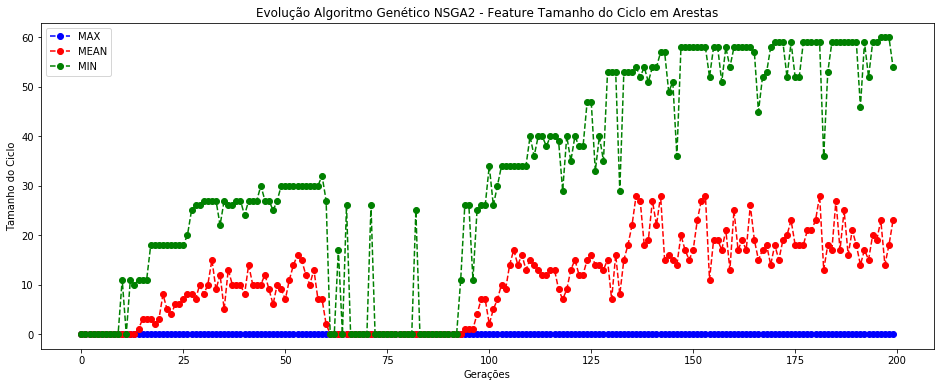

In [92]:
#
# Distancia percorrida DFS
plt.figure(figsize=(16,6))
plt.plot(PlotMinTamCiclo, 'ob--' , label='MAX')
plt.plot(PlotMeanTamCiclo, 'or--' ,label='MEAN')
plt.plot(PlotMaxTamCiclo, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Tamanho do Ciclo')
plt.title('Evolução Algoritmo Genético NSGA2 - Feature Tamanho do Ciclo em Arestas')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTotArestasCiclo.pdf",format="pdf")
#plt.show()

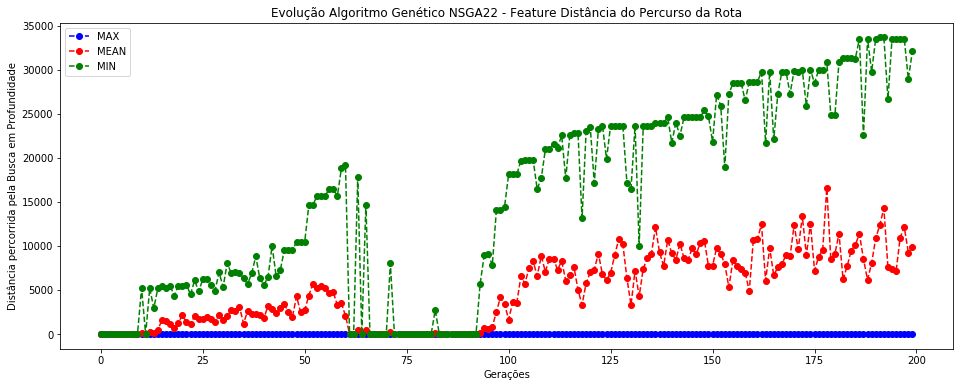

In [93]:
#
# Distancia percorrida DFS
plt.figure(figsize=(16,6))
plt.plot(PlotMinDistCiclo, 'ob--' , label='MAX')
plt.plot(PlotMeanDistCiclo, 'or--' ,label='MEAN')
plt.plot(PlotMaxDistCiclo, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Distância percorrida pela Busca em Profundidade')
plt.title('Evolução Algoritmo Genético NSGA22 - Feature Distância do Percurso da Rota')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTamCicloRota.pdf",format="pdf")
#plt.show()

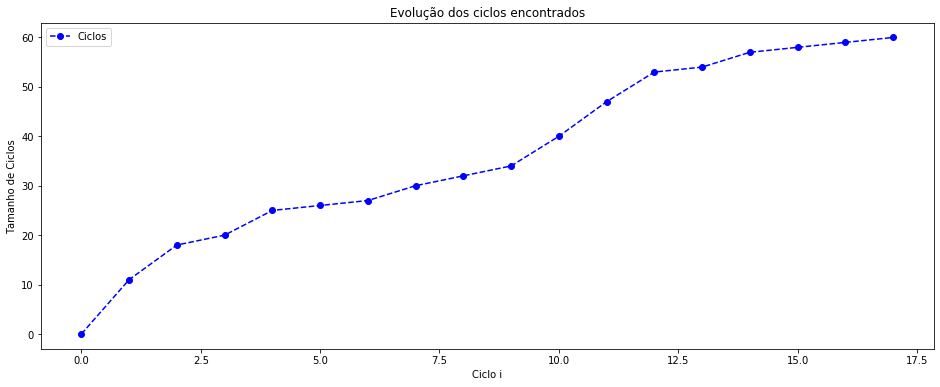

In [94]:
#
# Evolução dos ciclos encontrados
plt.figure(figsize=(16,6))
plt.plot(PlotMaioresCiclos, 'ob--' , label='Ciclos')
plt.xlabel('Ciclo i')
plt.ylabel('Tamanho de Ciclos')
plt.title('Evolução dos ciclos encontrados')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTamanhoCiclos.pdf",format="pdf")
#plt.show()

# Plotagem das rotas geradas caso tenha encontrado

In [95]:
def salvarRotaTxt(via_vez, rota):
    try:
        path = "Rotas/Rota-"+str(via_vez)+".txt"
        arq = open(path, 'w')    
        for linha in rota:
            arq.write(linha+"\n")        
        arq.close()
    except:
        print("Erro salvar rota..")
    
def printFormatNamesStreet( via_vez , qtd_arestas, ruas ):
    
    try:
        contador = 1
        salvarText = []

        # +1 por causa do retorno do ciclo da rota    
        Rota = "Rota "+str(via_vez)+" - "+str(qtd_arestas)+" Arestas:\n"
        print(Rota)
        salvarText.append(Rota)

        for rua in ruas:
            concat = str(rua)
            Rua = ""+str(contador)+"ª - "+concat
            print(Rua)
            salvarText.append(Rua)
            contador = contador + 1

        Rua = ""+str(contador)+"ª - "+ruas[0]
        print(Rua)
        salvarText.append(Rua)

        salvarRotaTxt(via_vez, salvarText)
    except:
        print("Erro pegar rota..")
        
def printRotaRuas(via_vez, qtd_arestas, rota ):
    '''
    print(listaDadosNew[0])
    print()
    print(listaDadosNew[0][0])
    print()
    print(listaDadosNew[0][1])
    print()
    print(listaDadosNew[0][2])
    print()
    print(listaDadosNew[0][2]['name'])
    
    [321519672, 3589971255, {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}]

    321519672

    3589971255

    {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}

    Rua Coronel Pinto
    
    '''
    try:
                
        tamListaDadosNew = len(listaDadosNew)
        tamRotaLista = len(rota)

        ruasRota = []

        '''
            Arrumar os nomes das ruas..
        '''


        for rota_i in range( tamRotaLista ):            
            for lista_i in range(tamListaDadosNew):            
                if( listaDadosNew[lista_i][0] == rota[rota_i][0] and listaDadosNew[lista_i][1] == rota[rota_i][1] ):

                    if 'name' in listaDadosNew[lista_i][2]:
                        rua = listaDadosNew[lista_i][2]['name']

                        if rua not in ruasRota:
                            ruasRota.append(rua)

                    else:
                        ruasRota.append("Unname")

                    '''
                    print(listaDadosNew[lista_i])
                    print(rota[rota_i])
                    print()
                    '''                    

        printFormatNamesStreet(via_vez, qtd_arestas, ruasRota )
        print("\n\n")

    except:
        print("Erro...")
        

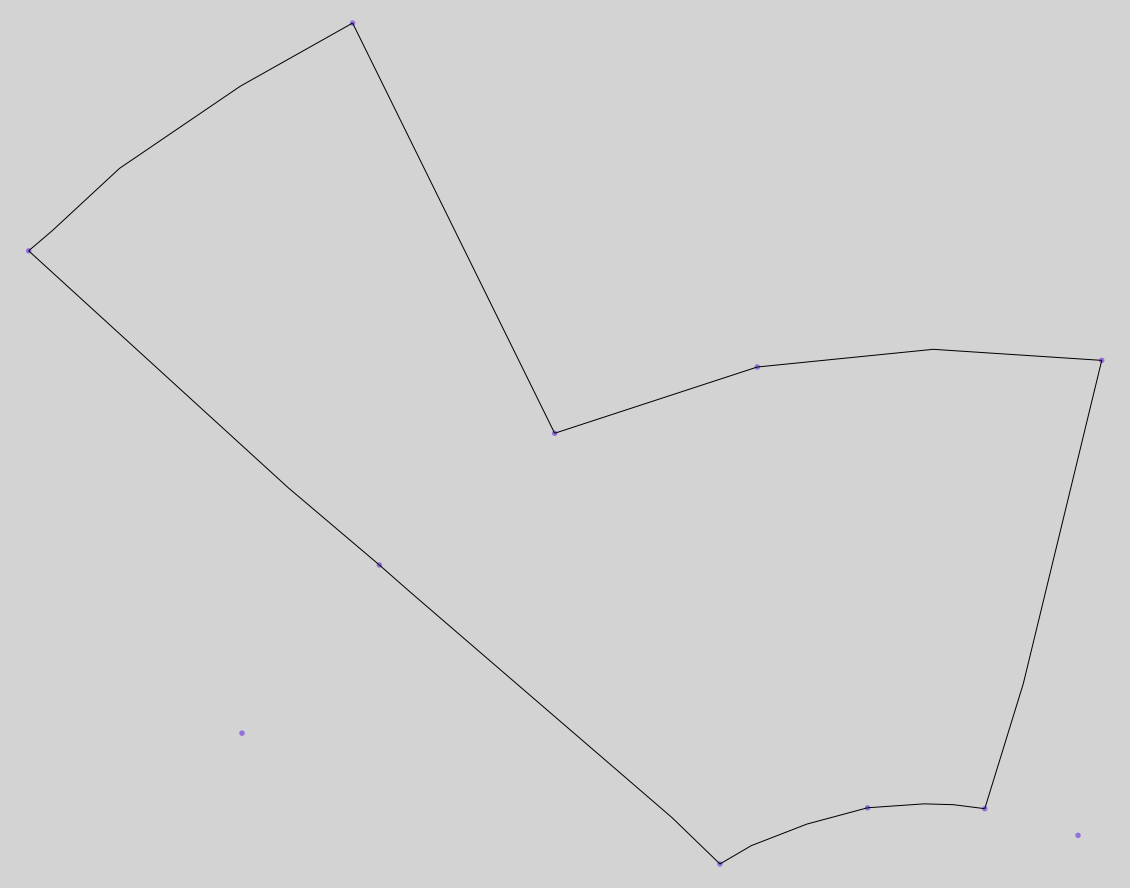



Rota 1 - 11 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Avenida Capitão Ene Garcêz
3ª - Rua Alfredo Cruz
4ª - Rua General Penha Brasil
5ª - Rua Coronel Pinto
6ª - Avenida Capitão Júlio Bezerra
7ª - Avenida Amazonas
8ª - Avenida Capitão Ene Garcez





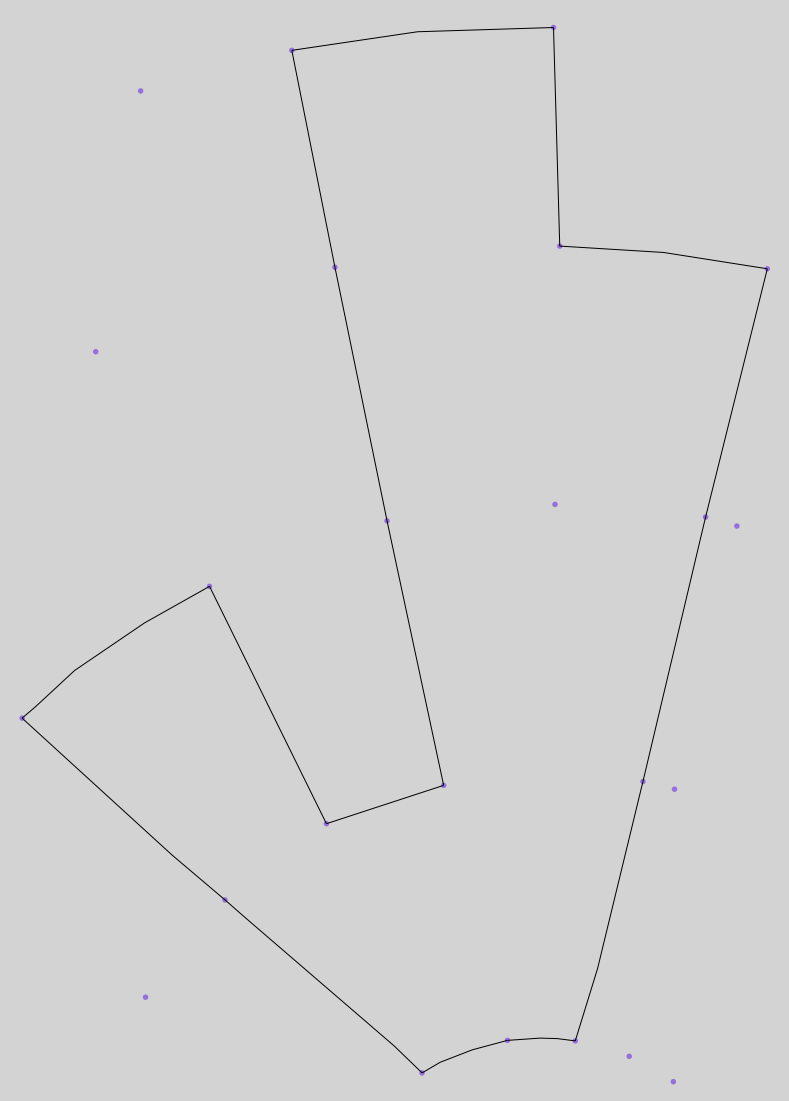



Rota 2 - 18 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Avenida Capitão Ene Garcêz
3ª - Rua Alfredo Cruz
4ª - Rua General Penha Brasil
5ª - Rua Coronel Pinto
6ª - Rua Professor Agnelo Bitencourt
7ª - Rua Coronel Mota
8ª - Rua Alferes Paulo Saldanha
9ª - Rua Barão do Rio Branco
10ª - Avenida Capitão Júlio Bezerra
11ª - Avenida Amazonas
12ª - Avenida Capitão Ene Garcez





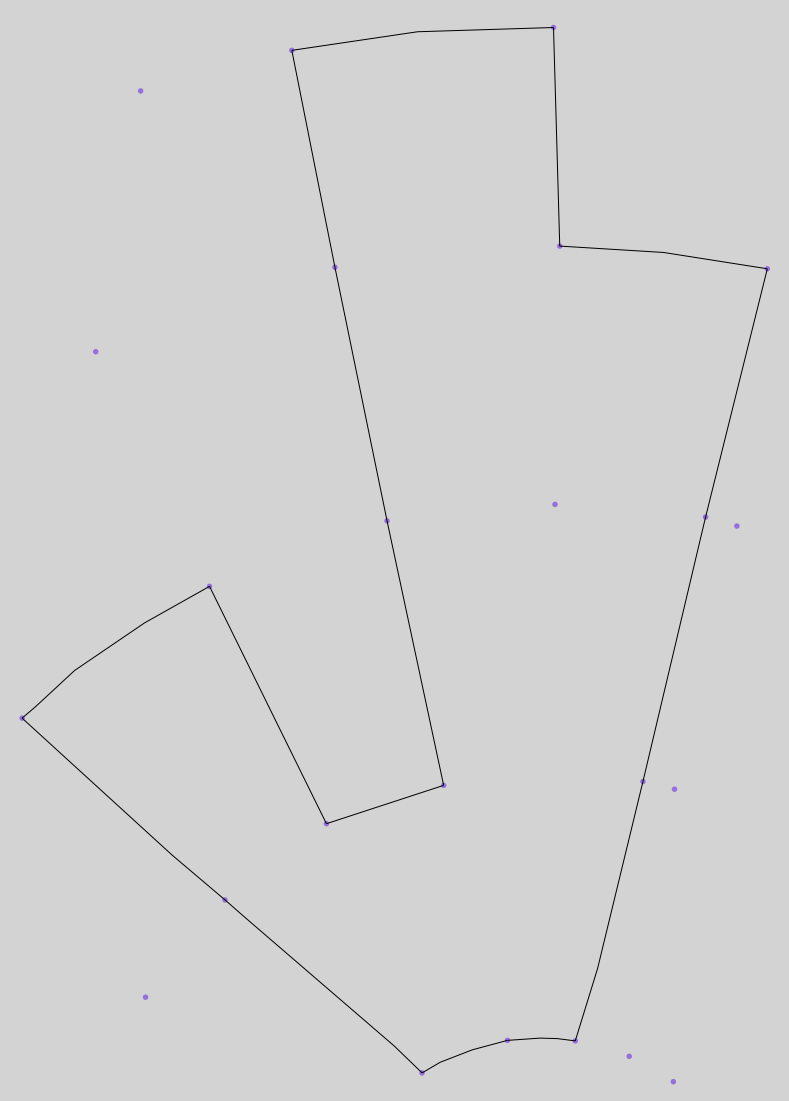



Rota 3 - 20 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Avenida Capitão Ene Garcêz
3ª - Rua Alfredo Cruz
4ª - Rua General Penha Brasil
5ª - Rua Coronel Pinto
6ª - Rua Professor Agnelo Bitencourt
7ª - Rua Coronel Mota
8ª - Rua Alferes Paulo Saldanha
9ª - Rua Barão do Rio Branco
10ª - Avenida Capitão Júlio Bezerra
11ª - Avenida Amazonas
12ª - Avenida Capitão Ene Garcez





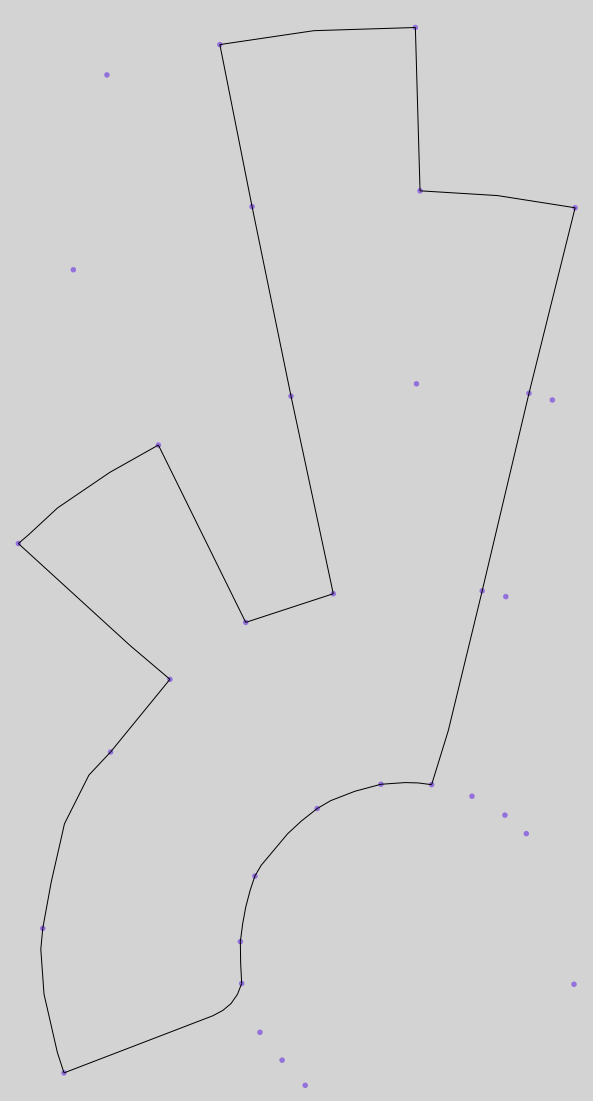



Rota 4 - 25 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Glaycon de Paiva
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Pinto
9ª - Rua Professor Agnelo Bitencourt
10ª - Rua Coronel Mota
11ª - Rua Alferes Paulo Saldanha
12ª - Rua Barão do Rio Branco
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Amazonas





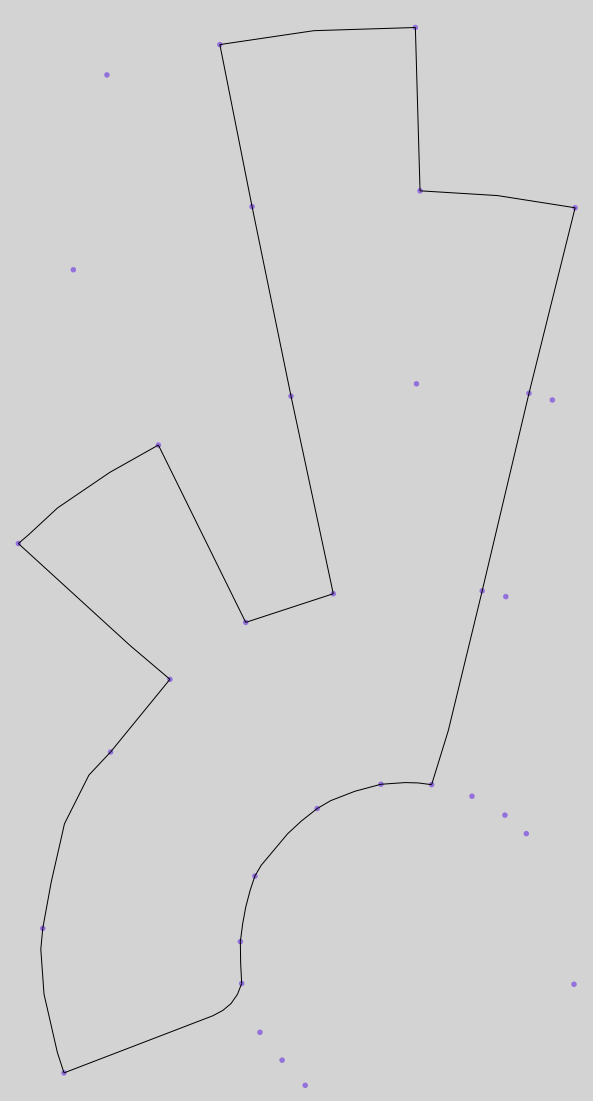



Rota 5 - 26 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Glaycon de Paiva
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Pinto
9ª - Rua Professor Agnelo Bitencourt
10ª - Rua Coronel Mota
11ª - Rua Alferes Paulo Saldanha
12ª - Rua Barão do Rio Branco
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Amazonas





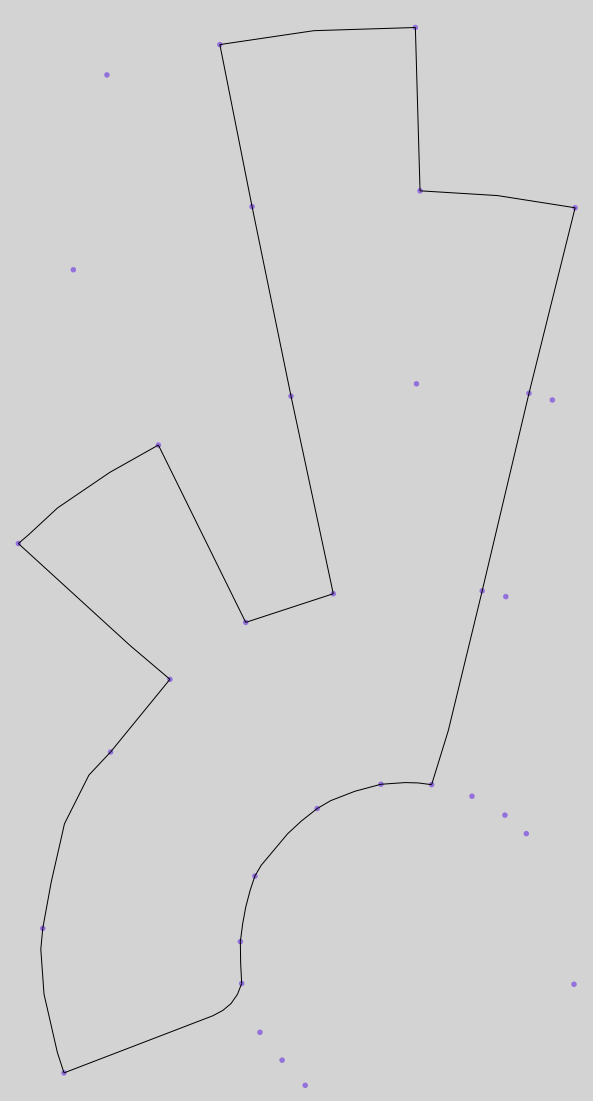



Rota 6 - 27 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Glaycon de Paiva
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Pinto
9ª - Rua Professor Agnelo Bitencourt
10ª - Rua Coronel Mota
11ª - Rua Alferes Paulo Saldanha
12ª - Rua Barão do Rio Branco
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Amazonas





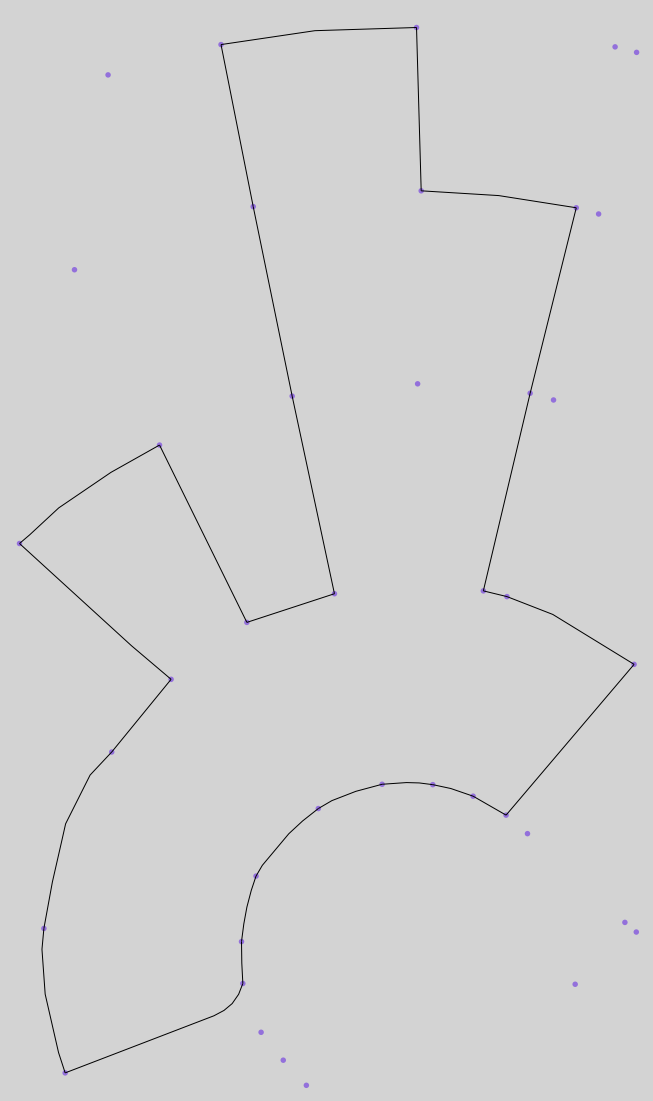



Rota 7 - 30 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Glaycon de Paiva
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Pinto
9ª - Rua Professor Agnelo Bitencourt
10ª - Rua Coronel Mota
11ª - Rua Alferes Paulo Saldanha
12ª - Rua Barão do Rio Branco
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Ville Roy
15ª - Avenida Amazonas





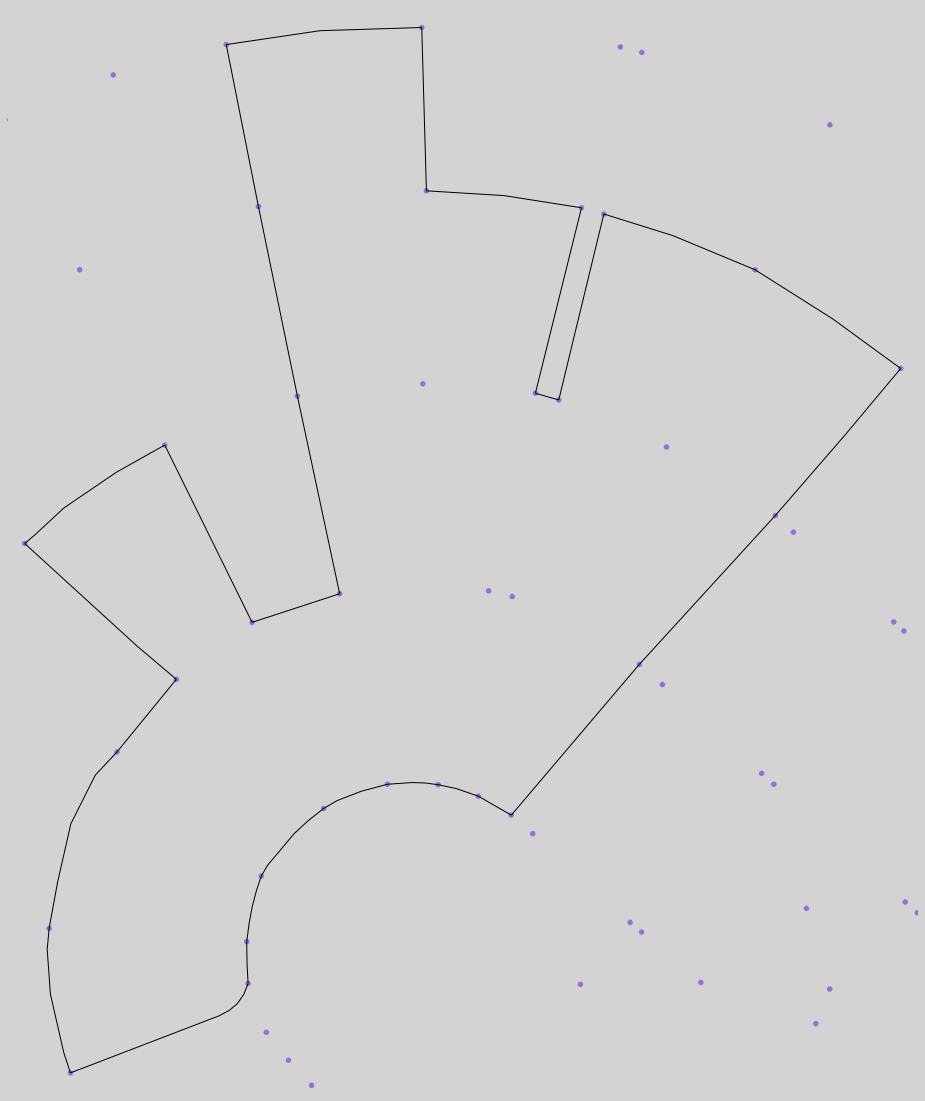



Rota 8 - 32 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Glaycon de Paiva
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Pinto
9ª - Rua Professor Agnelo Bitencourt
10ª - Rua Coronel Mota
11ª - Rua Alferes Paulo Saldanha
12ª - Rua Barão do Rio Branco
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Ville Roy
15ª - Avenida Amazonas





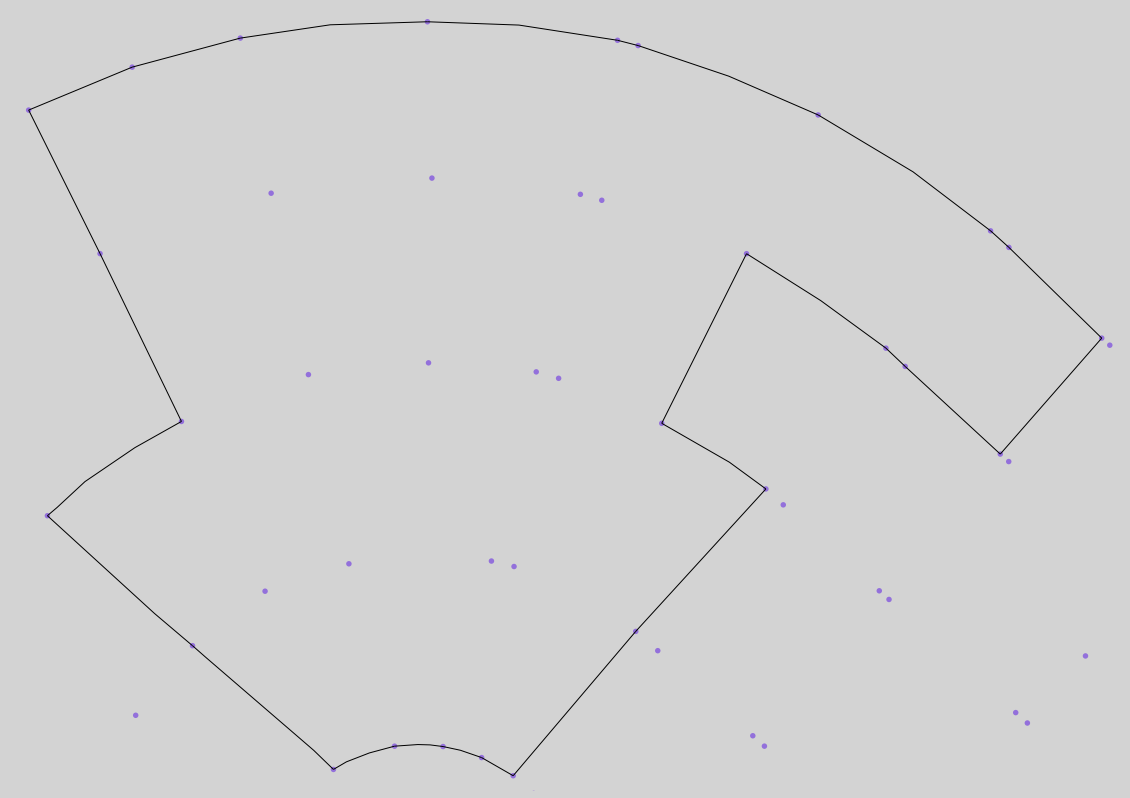



Rota 9 - 34 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Avenida Capitão Ene Garcêz
3ª - Rua Alfredo Cruz
4ª - Rua General Penha Brasil
5ª - Rua Coronel Mota
6ª - Avenida Nossa Senhora da Consolata
7ª - Rua Barão do Rio Branco
8ª - Rua Rocha Leal
9ª - Avenida Ville Roy
10ª - Avenida Amazonas
11ª - Avenida Capitão Ene Garcez





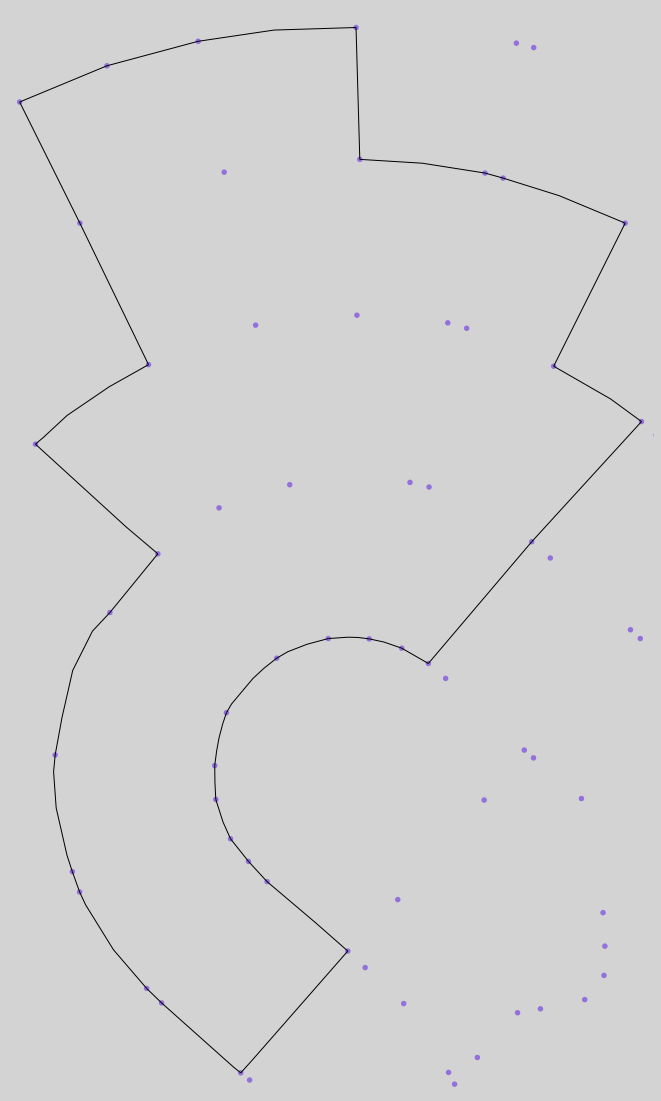



Rota 10 - 40 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Nossa Senhora da Consolata
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Mota
9ª - Rua Alferes Paulo Saldanha
10ª - Rua Barão do Rio Branco
11ª - Rua Rocha Leal
12ª - Avenida Ville Roy
13ª - Avenida Amazonas





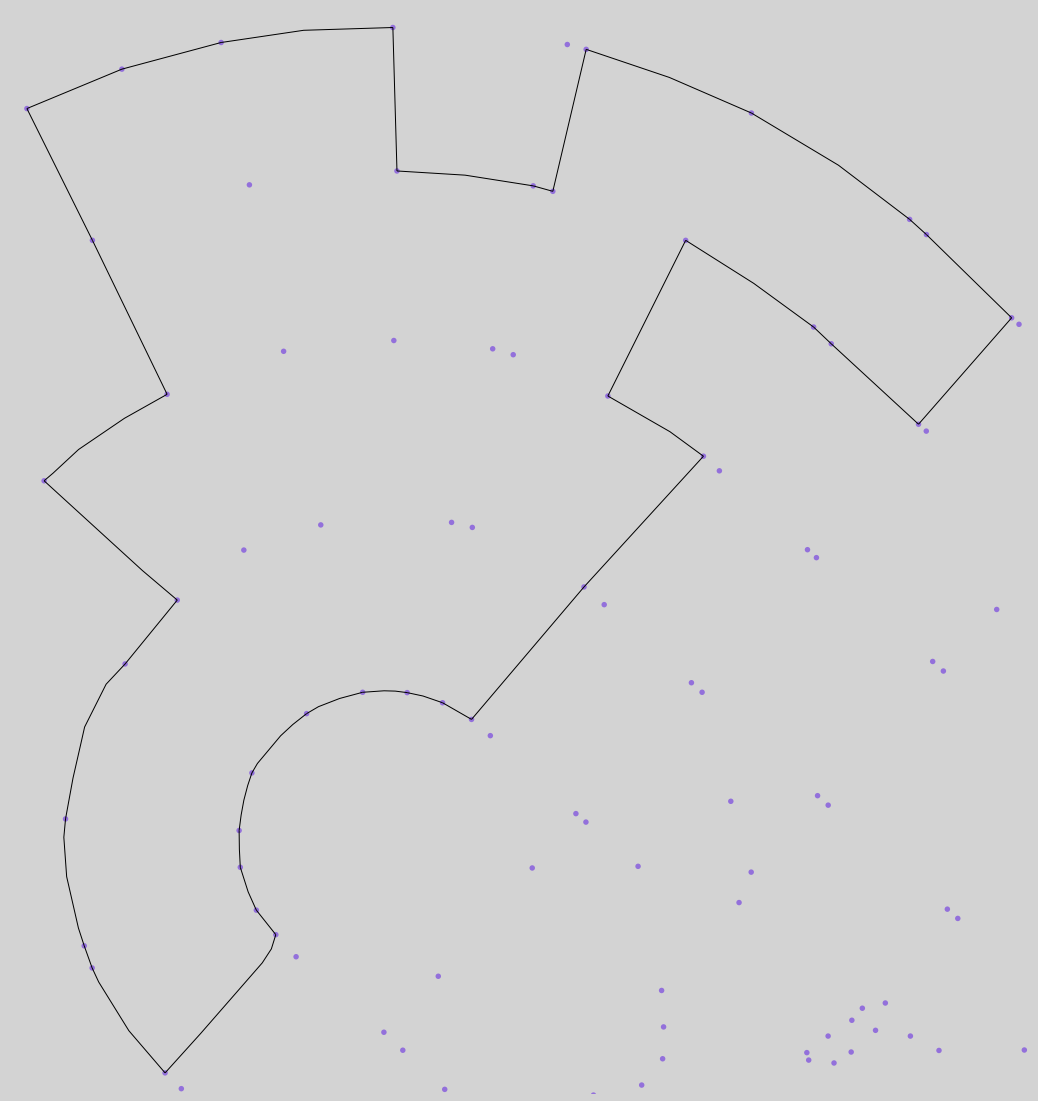



Rota 11 - 47 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Ville Roy
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Mota
9ª - Rua Alferes Paulo Saldanha
10ª - Rua Barão do Rio Branco
11ª - Avenida Capitão Júlio Bezerra
12ª - Avenida Nossa Senhora da Consolata
13ª - Rua Rocha Leal
14ª - Avenida Amazonas





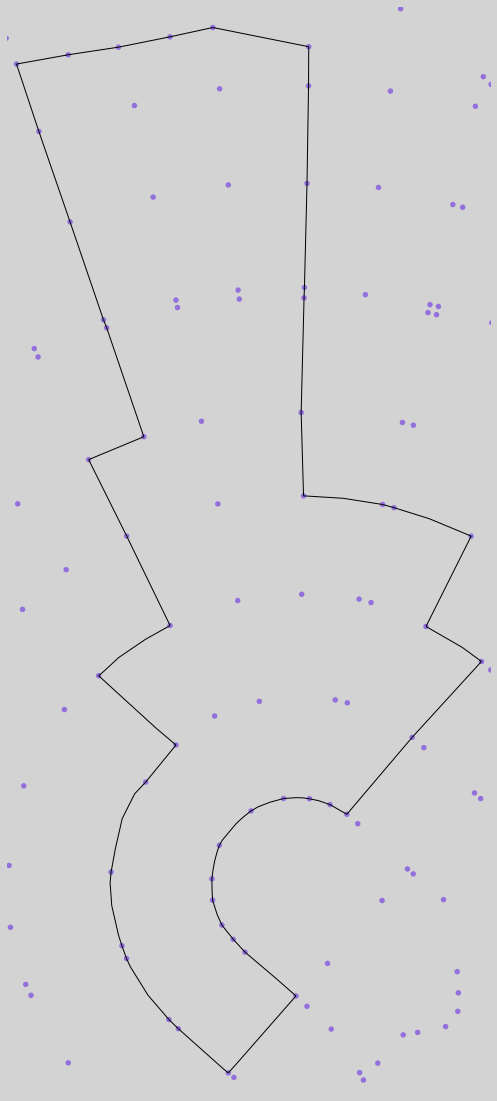



Rota 12 - 53 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Nossa Senhora da Consolata
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Coronel Mota
9ª - Rua Valério Magalhães
10ª - Rua Tiradentes
11ª - Rua Alferes Paulo Saldanha
12ª - Rua Barão do Rio Branco
13ª - Rua Rocha Leal
14ª - Avenida Ville Roy
15ª - Avenida Amazonas





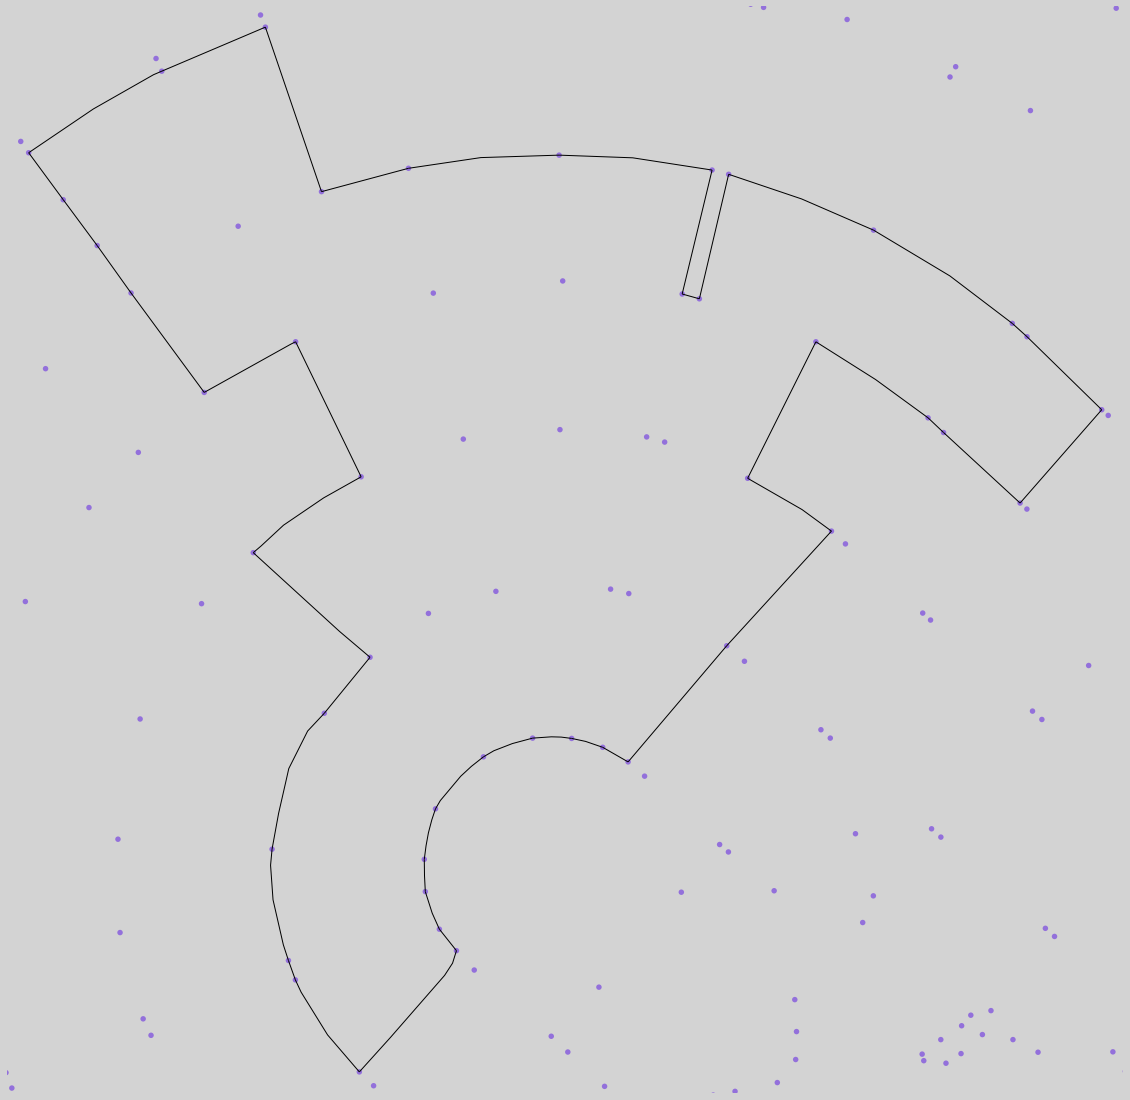



Rota 13 - 54 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Ville Roy
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Barão do Rio Branco
9ª - Rua Major Manoel Correia
10ª - Avenida Major Williams
11ª - Rua Valério Magalhães
12ª - Rua Coronel Mota
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Nossa Senhora da Consolata
15ª - Rua Rocha Leal
16ª - Avenida Amazonas





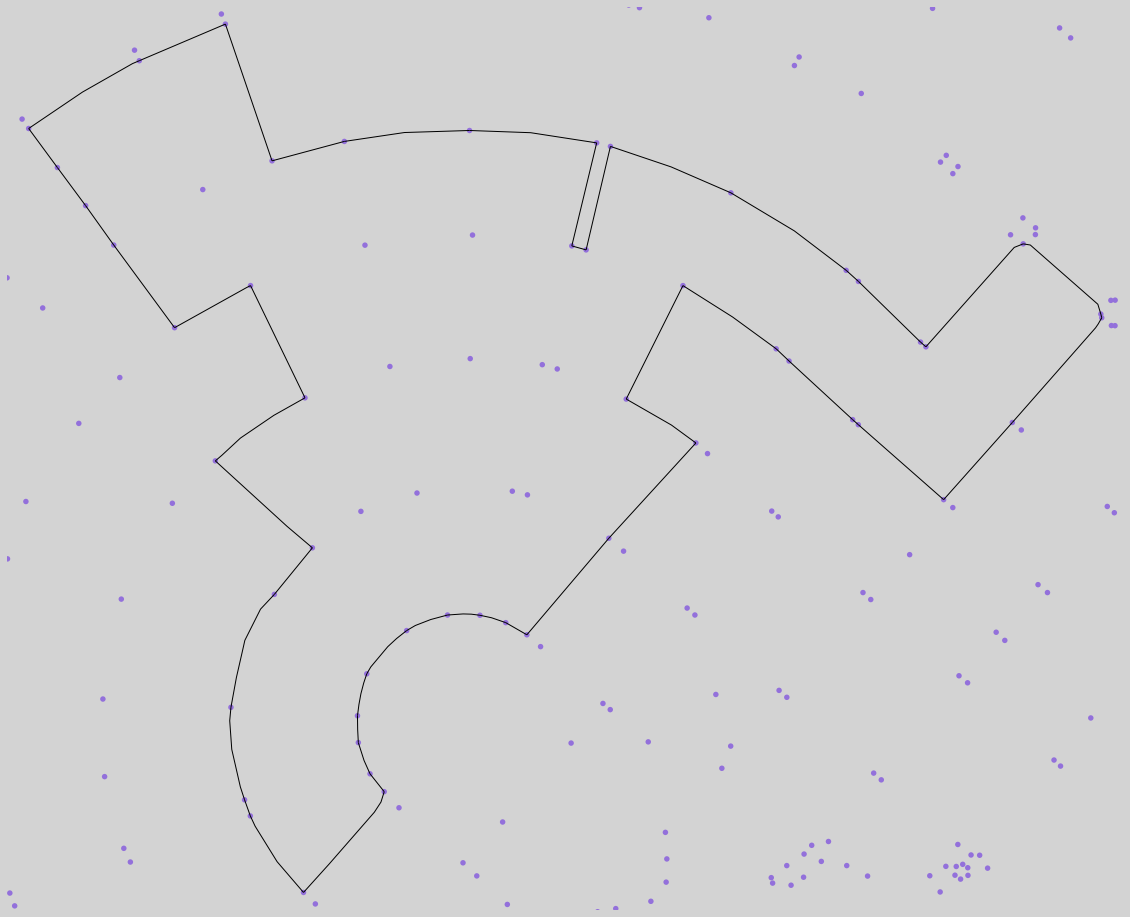



Rota 14 - 57 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Ville Roy
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Barão do Rio Branco
9ª - Rua Major Manoel Correia
10ª - Avenida Major Williams
11ª - Rua Valério Magalhães
12ª - Rua Coronel Mota
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Nossa Senhora da Consolata
15ª - Unname
16ª - Avenida Benjamin Constant
17ª - Rua Rocha Leal
18ª - Avenida Amazonas





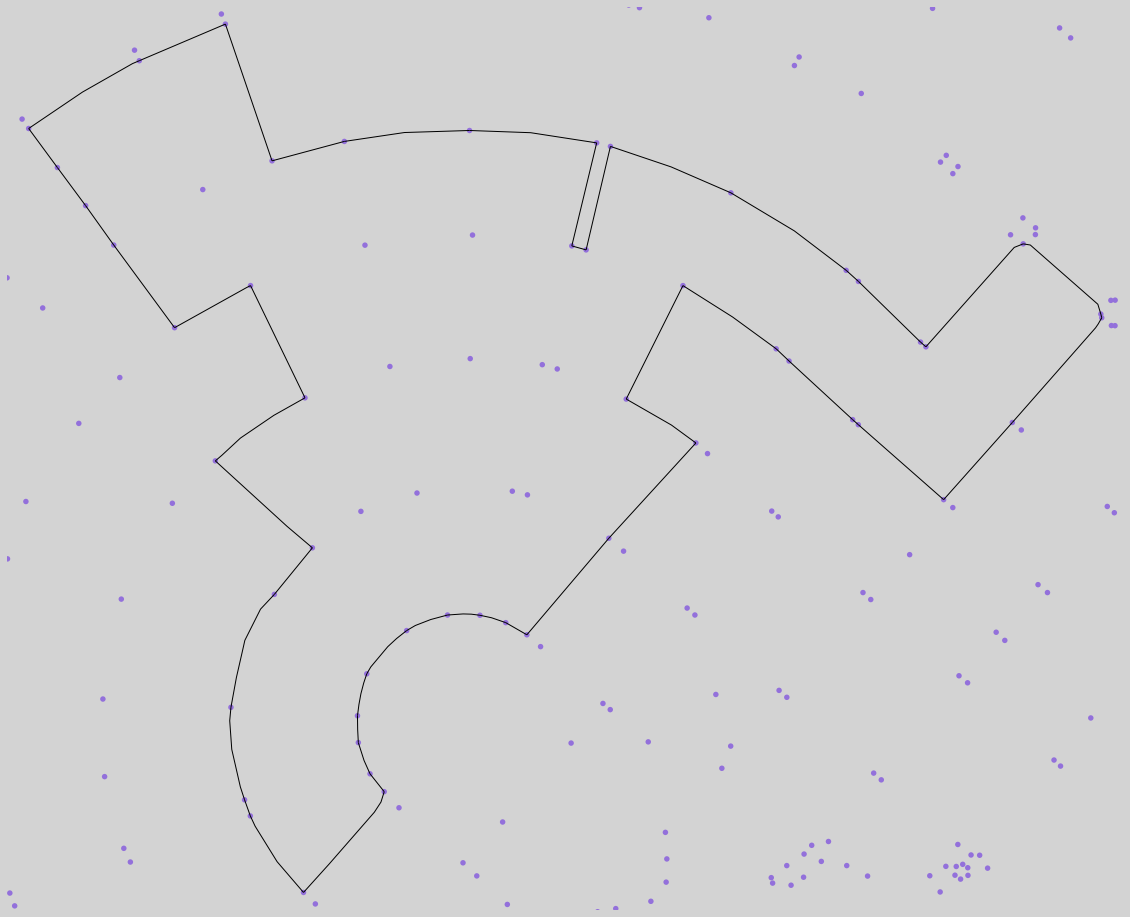



Rota 15 - 58 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Ville Roy
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Barão do Rio Branco
9ª - Rua Major Manoel Correia
10ª - Avenida Major Williams
11ª - Rua Valério Magalhães
12ª - Rua Coronel Mota
13ª - Avenida Capitão Júlio Bezerra
14ª - Avenida Nossa Senhora da Consolata
15ª - Unname
16ª - Avenida Benjamin Constant
17ª - Rua Rocha Leal
18ª - Avenida Amazonas





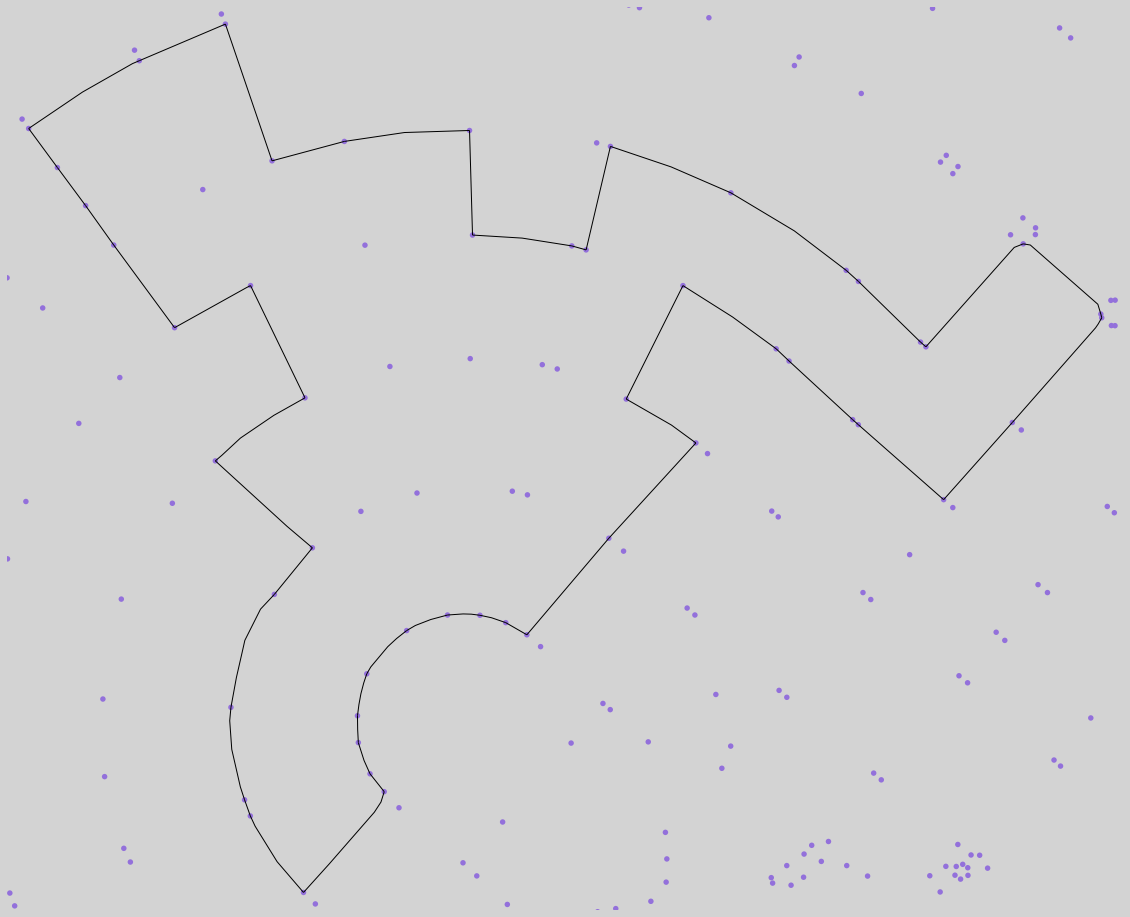



Rota 16 - 59 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Ville Roy
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Barão do Rio Branco
9ª - Rua Major Manoel Correia
10ª - Avenida Major Williams
11ª - Rua Valério Magalhães
12ª - Rua Coronel Mota
13ª - Rua Alferes Paulo Saldanha
14ª - Avenida Capitão Júlio Bezerra
15ª - Avenida Nossa Senhora da Consolata
16ª - Unname
17ª - Avenida Benjamin Constant
18ª - Rua Rocha Leal
19ª - Avenida Amazonas





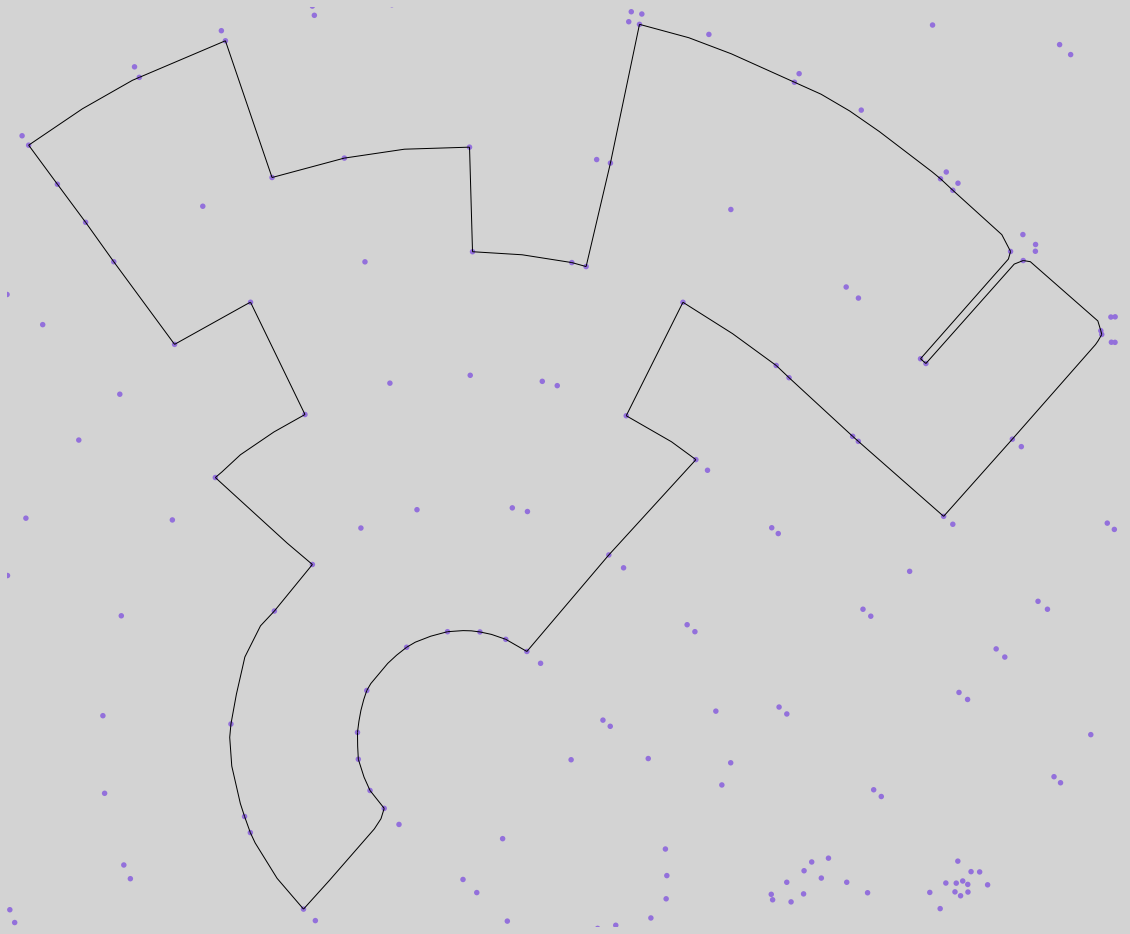



Rota 17 - 60 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Ville Roy
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Avenida Capitão Ene Garcêz
6ª - Rua Alfredo Cruz
7ª - Rua General Penha Brasil
8ª - Rua Barão do Rio Branco
9ª - Rua Major Manoel Correia
10ª - Avenida Major Williams
11ª - Rua Valério Magalhães
12ª - Rua Coronel Mota
13ª - Rua Alferes Paulo Saldanha
14ª - Avenida Capitão Júlio Bezerra
15ª - Avenida Nossa Senhora da Consolata
16ª - Unname
17ª - Avenida Benjamin Constant
18ª - Rua Rocha Leal
19ª - Avenida Amazonas





In [96]:
removerNodosFinal = []
cont=1
contador = 0
if len(listaResultadoDFS) > 0:
    for cadaCicloEncontrado in range(len(listaResultadoDFS)):
        contador = contador + 1        
        for nodos in listaDadosNew:
            v = (nodos[0], nodos[1])

            if v not in listaResultadoDFS[ cadaCicloEncontrado ]:
                removerNodosFinal.append(v)

        if len(removerNodosFinal) > 0:
            G_aux = G.copy()
            G_aux.remove_edges_from(removerNodosFinal)
            
            # para salvar
            name = "Rota-"+ str(contador)
            fig, ax = ox.plot_graph(G_aux, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename=name, save=True,  file_format=formato_imgs)
            
            #fig, ax = ox.plot_graph(G_aux, fig_height=30, node_color='blue', node_size=5, node_zorder=1, node_edgecolor='k', )
            print("\n")
            removerNodosFinal.clear()
            
            '''
                Imprimir ruas do trajeto
            '''
            #print(PlotMaioresCiclos)
            printRotaRuas( contador, PlotMaioresCiclos[contador] , listaResultadoDFS[cadaCicloEncontrado] )
            
        
else:
    print("Infelizmente não foi possivel encontrar uma rota....")

 <h1 style="text-align: center;"> FIMMM --- Obrigado </h1>